In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="Set2")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, f_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load train and test datasets
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [3]:
# Find shape 
print("Train dataset shape:", train_df.shape)
print("Test dataset shape :", test_df.shape)

Train dataset shape: (59598, 24)
Test dataset shape : (14900, 24)


In [4]:
# View first 5 rows of train and test
print("Train dataset head:")
display(train_df.head())

print("\nTest dataset head:")
display(test_df.head())

Train dataset head:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed



Test dataset head:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [5]:
# Basic info about datasets
print("Train dataset info:")
train_df.info()

print("\nTest dataset info:")
test_df.info()

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Nu

In [6]:
# Statistical summary
print("Train dataset summary:")
display(train_df.describe(include='all'))

print("Test dataset summary:")
display(test_df.describe(include='all'))

Train dataset summary:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,59598.000000,59598.000000,59598,59598.000000,59598,59598.000000,59598,59598,59598,59598.000000,...,59598.000000,59598,59598,59598.000000,59598,59598,59598,59598,59598,59598
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Entry,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,32739,NaN,15507,NaN,22528,29779,35810,NaN,...,NaN,23867,29745,NaN,48239,56680,49895,29766,23758,31260
mean,37227.118729,38.565875,NaN,15.753901,NaN,7302.397983,NaN,NaN,NaN,0.832578,...,1.648075,NaN,NaN,55.758415,NaN,NaN,NaN,NaN,NaN,NaN
std,21519.150028,12.079673,NaN,11.245981,NaN,2151.457423,NaN,NaN,NaN,0.994991,...,1.555689,NaN,NaN,25.411090,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,1.000000,NaN,1316.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18580.250000,28.000000,NaN,7.000000,NaN,5658.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37209.500000,39.000000,NaN,13.000000,NaN,7354.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55876.750000,49.000000,NaN,23.000000,NaN,8880.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN


Test dataset summary:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,14900.000000,14900.000000,14900,14900.000000,14900,14900.000000,14900,14900,14900,14900.000000,...,14900.000000,14900,14900,14900.000000,14900,14900,14900,14900,14900,14900
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Mid,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,8087,NaN,3815,NaN,5630,7466,8909,NaN,...,NaN,5925,7486,NaN,12061,14165,12499,7416,5862,7868
mean,37339.022081,38.385235,NaN,15.592416,NaN,7287.306040,NaN,NaN,NaN,0.834362,...,1.659329,NaN,NaN,55.603624,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.129293,12.097904,NaN,11.133792,NaN,2156.737934,NaN,NaN,NaN,0.996511,...,1.545401,NaN,NaN,25.352807,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,18.000000,NaN,1.000000,NaN,1226.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18825.500000,28.000000,NaN,7.000000,NaN,5633.750000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37433.000000,38.000000,NaN,13.000000,NaN,7332.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55857.500000,49.000000,NaN,23.000000,NaN,8852.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Missing values check
print("Missing values in train set:")
print(train_df.isnull().sum())

print("\nMissing values in test set:")
print(test_df.isnull().sum())

Missing values in train set:
Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Missing values in test set:
Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0

In [8]:
# Identify categorical and numerical features of train dataset
num_features  = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features  = train_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Categorical Features: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


In [9]:
# Check target variable distribution
print("Attrition Value Counts:")
print(train_df['Attrition'].value_counts())
print("\nAttrition Distribution (%):")
print(train_df['Attrition'].value_counts(normalize=True) * 100)

Attrition Value Counts:
Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

Attrition Distribution (%):
Attrition
Stayed    52.451425
Left      47.548575
Name: proportion, dtype: float64


# Exploratory Data Analysis

## Distribution of Attrition

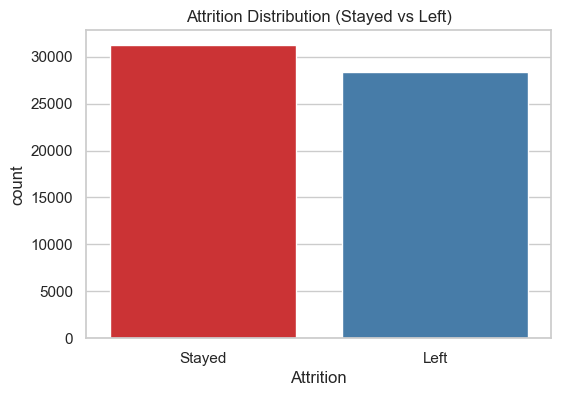

Attrition Counts:
Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

Attrition Percentage:
Attrition
Stayed    52.451425
Left      47.548575
Name: proportion, dtype: float64


In [10]:
# Check distribution of Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="Attrition", hue="Attrition", palette="Set1", legend=False)
plt.title("Attrition Distribution (Stayed vs Left)")
plt.show()

print("Attrition Counts:")
print(train_df["Attrition"].value_counts())
print("\nAttrition Percentage:")
print(train_df["Attrition"].value_counts(normalize=True) * 100)

## Univariate analysis

### Histograms for numerical features

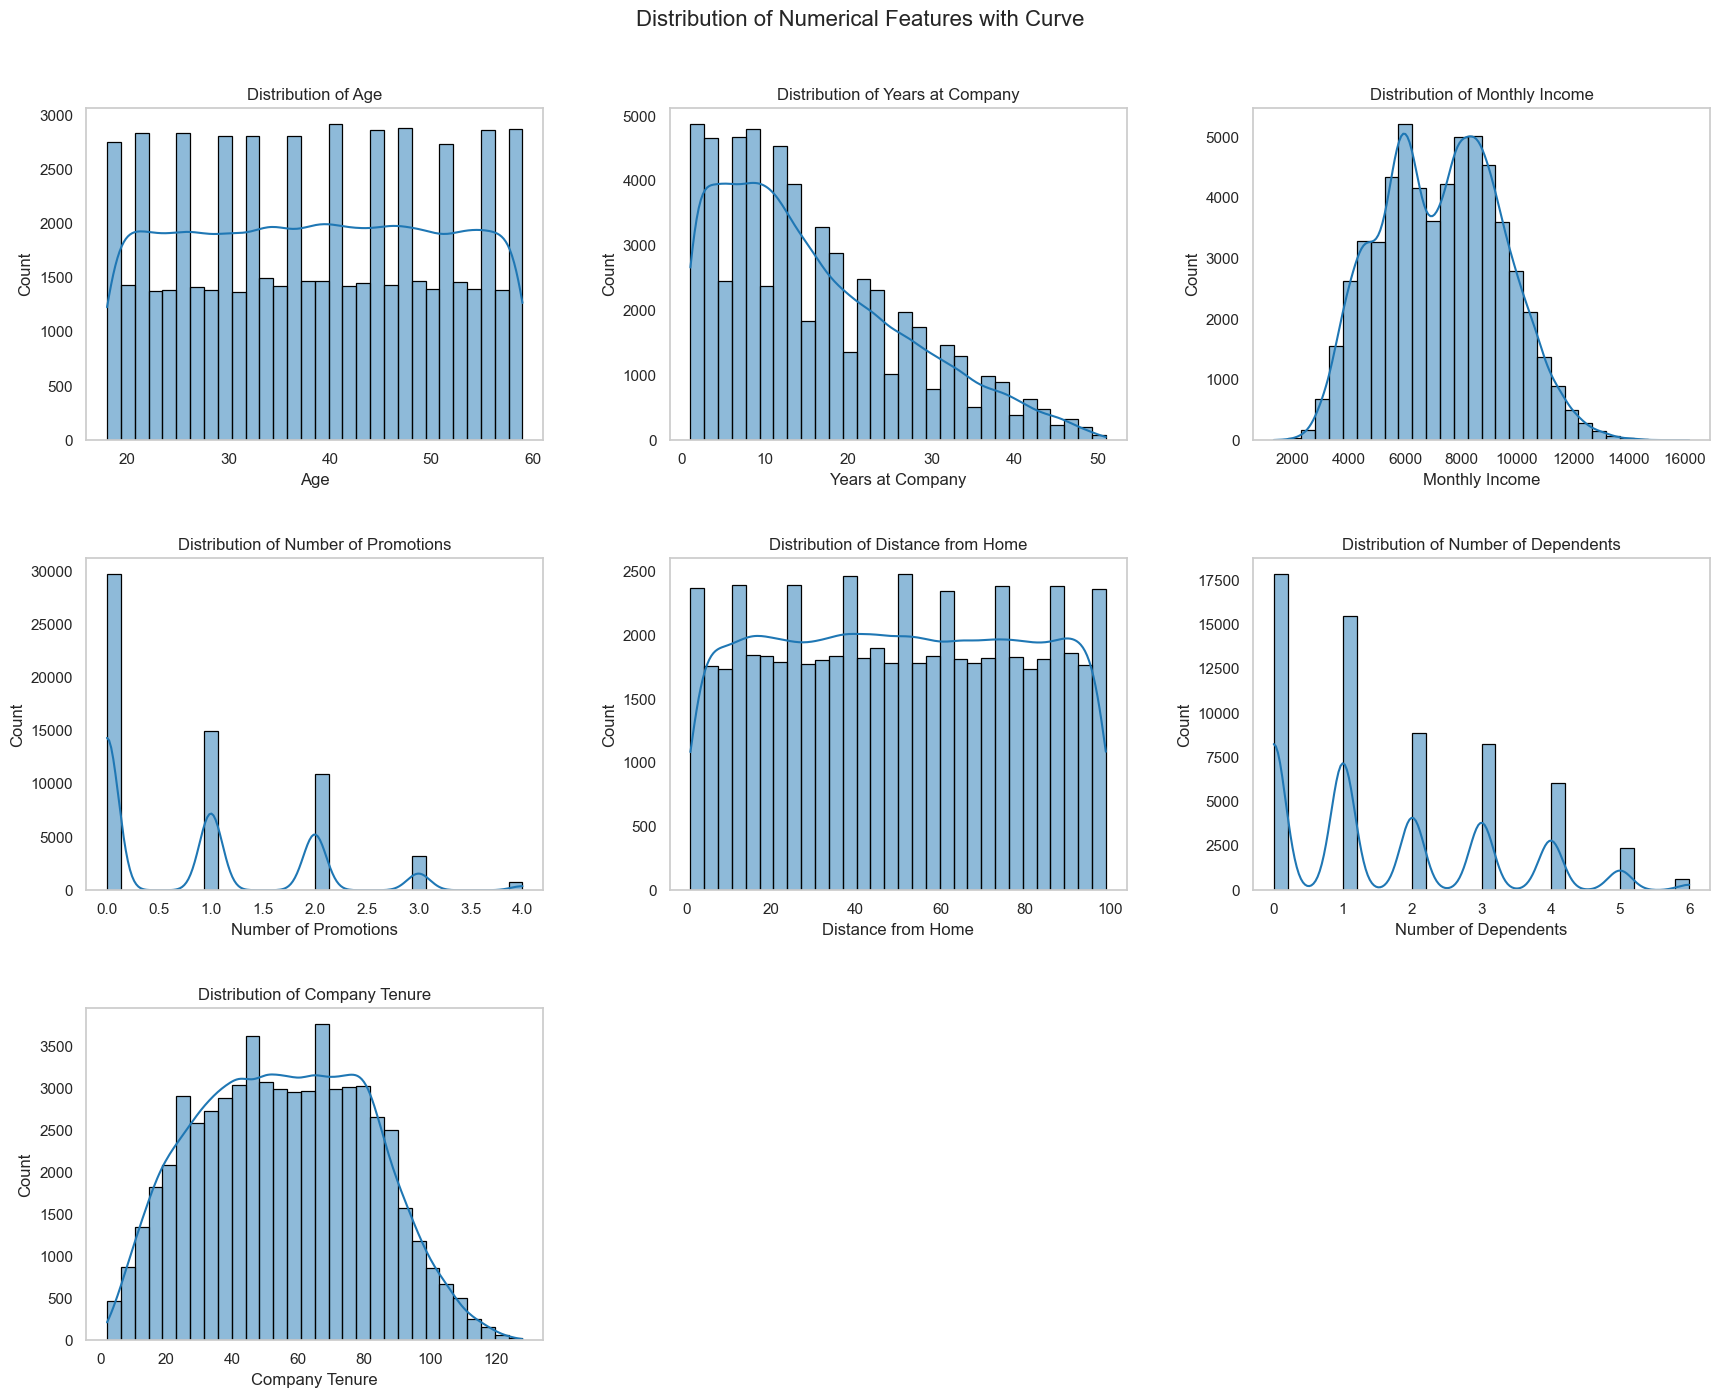

In [11]:
# Histograms for numerical features
num_features = ['Age', 'Years at Company', 'Monthly Income', 
                'Number of Promotions', 'Distance from Home', 
                'Number of Dependents', 'Company Tenure']

plt.figure(figsize=(18, 14)) 
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(train_df[col], bins=30, kde=True, edgecolor="black", color="tab:blue")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.grid(False)

plt.tight_layout(pad=3)
plt.suptitle("Distribution of Numerical Features with Curve", fontsize=16, y=1.02)
plt.show()


### Bar plots for categorical features

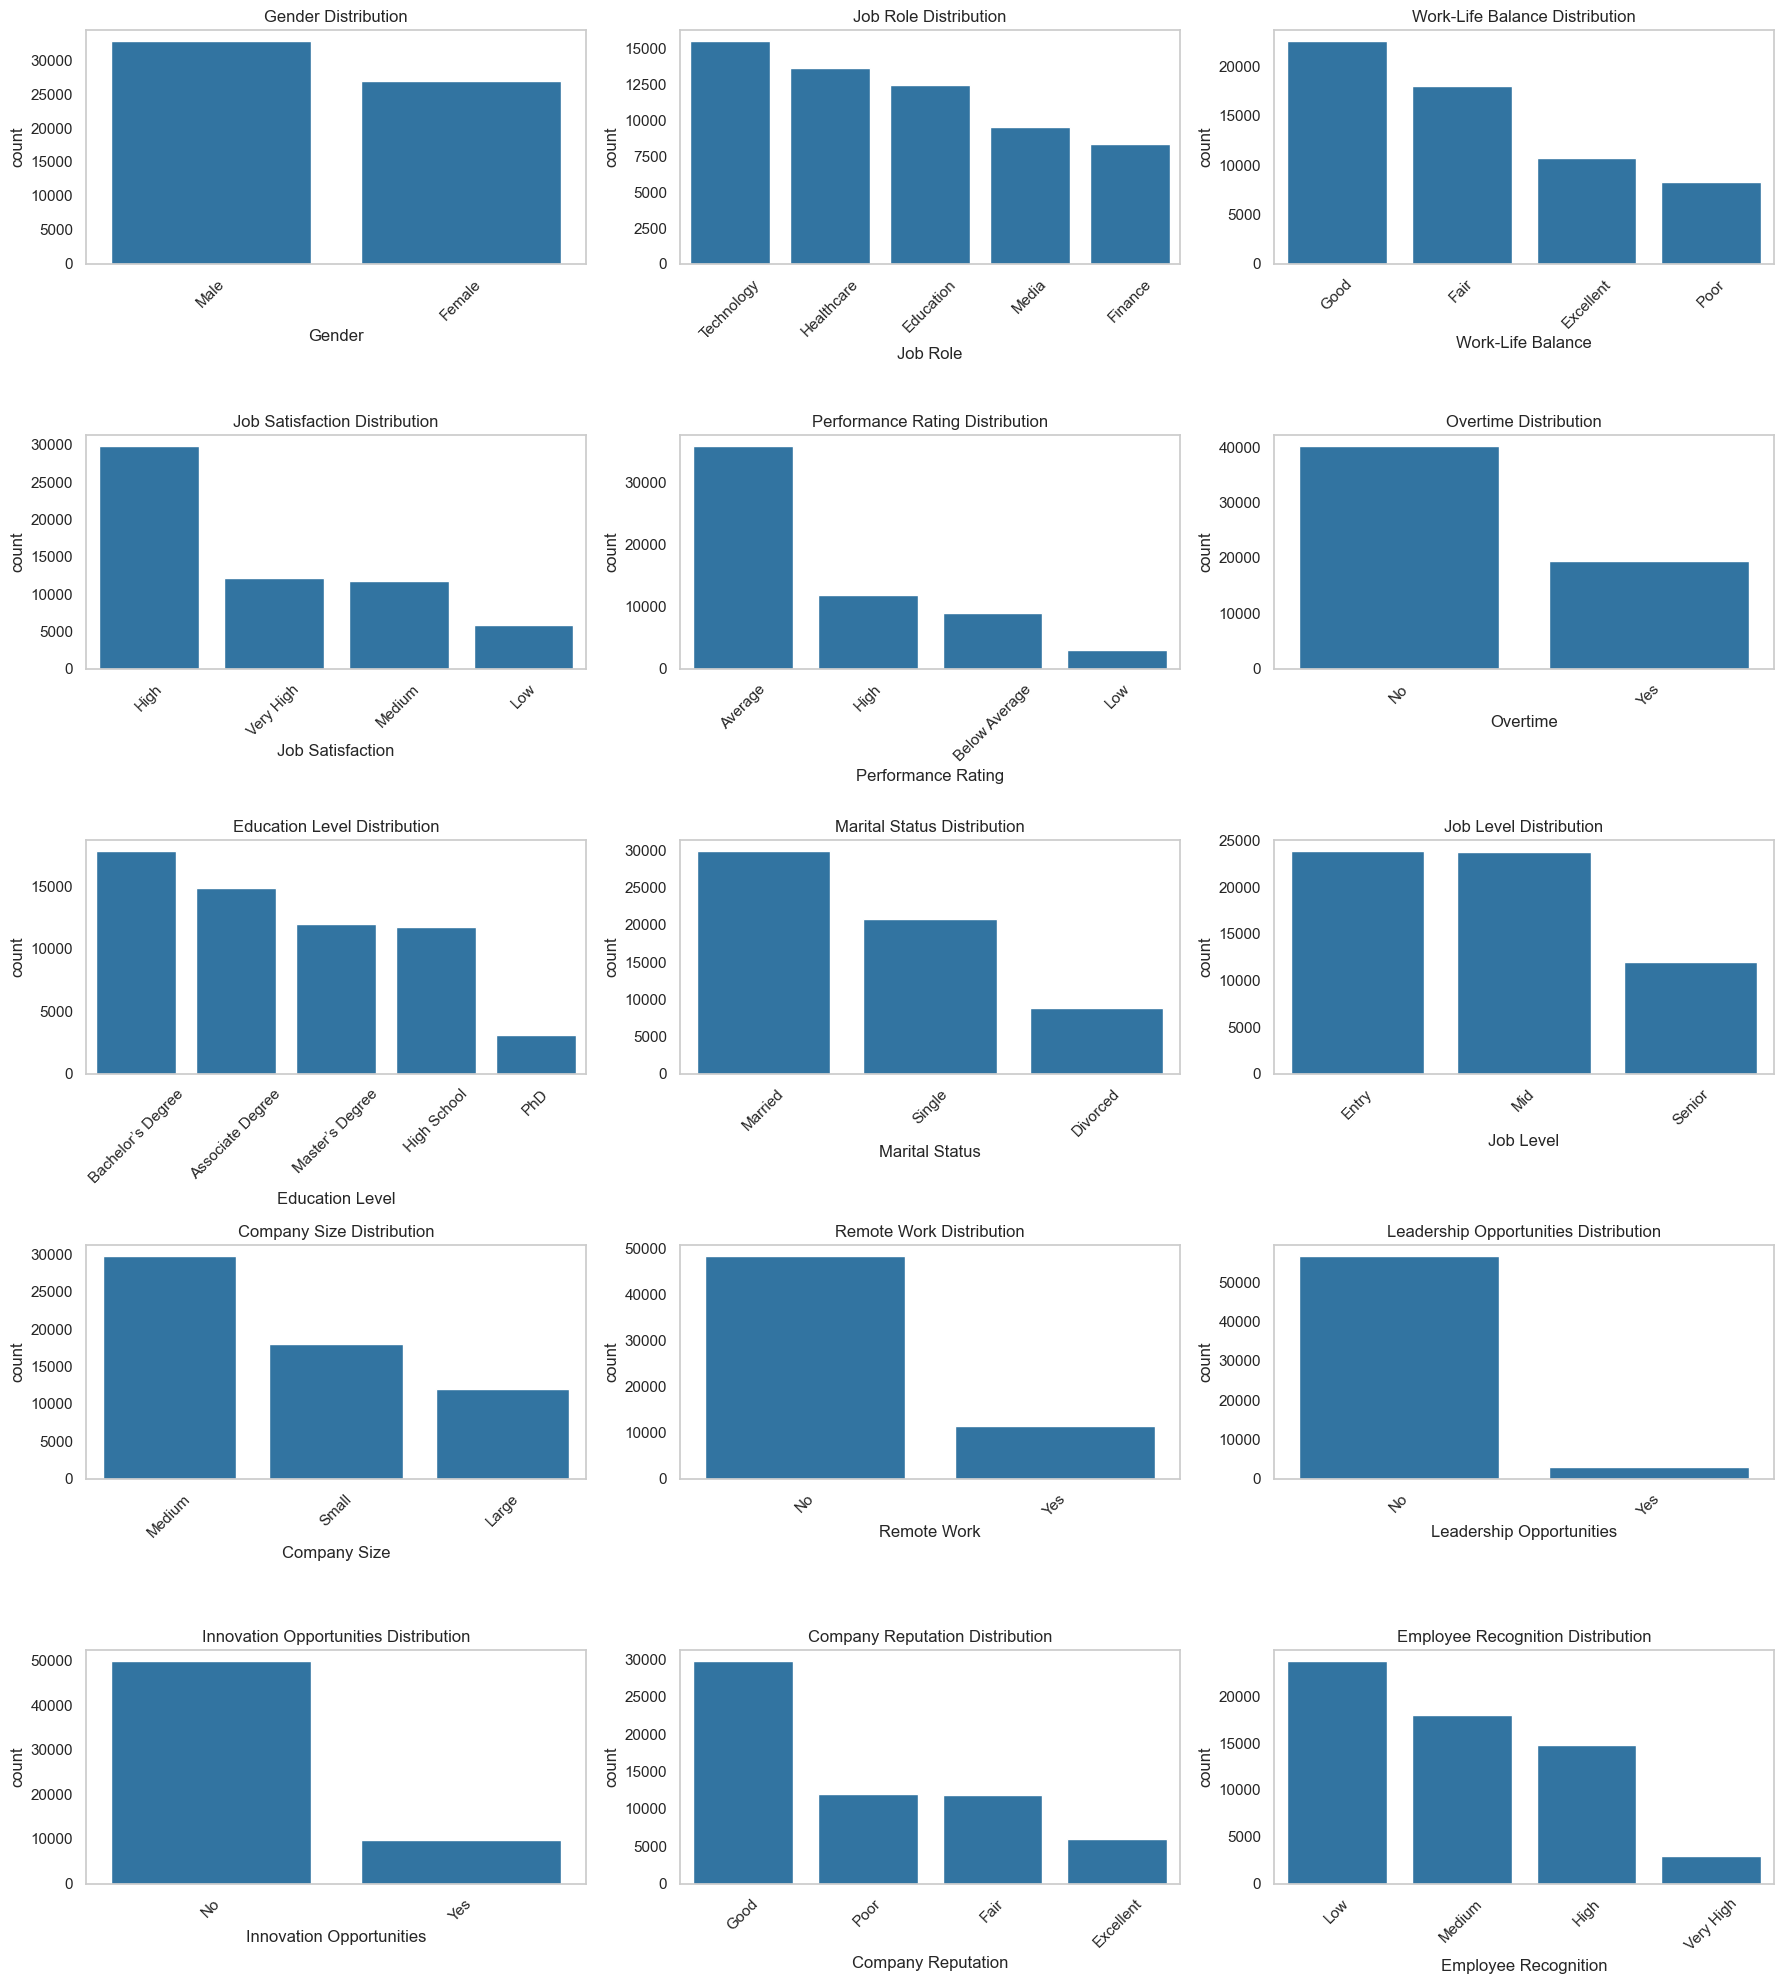

In [12]:
# Bar plots for categorical features
cat_features = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
                'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
                'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
                'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

fig, axes = plt.subplots(5, 3, figsize=(18,20))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(data=train_df, x=col, ax=axes[i], order=train_df[col].value_counts().index, color="tab:blue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(False)

plt.tight_layout()
plt.show()


## Bivariate Analysis

### Boxplots (Numerical features vs Attrition)

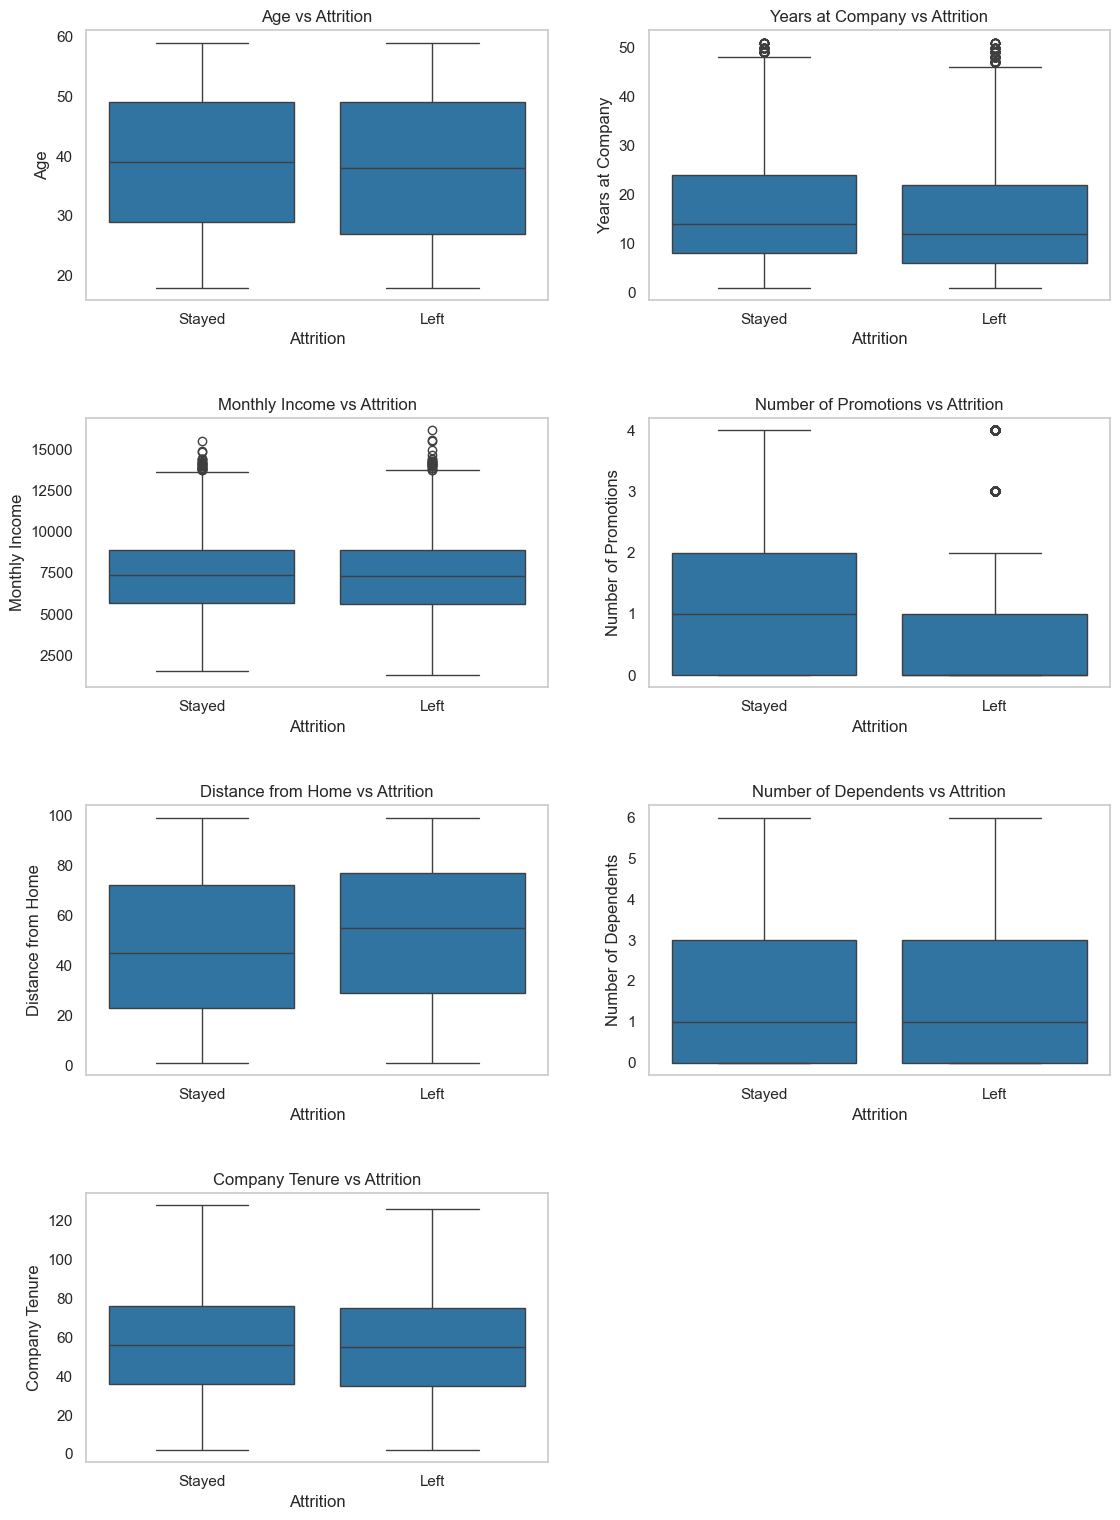

In [13]:
# Boxplots to see differences across attrition
plt.figure(figsize=(12,16))

for i, col in enumerate(num_features, 1):
    plt.subplot(4,2,i)
    sns.boxplot(data=train_df, x="Attrition", y=col, color="tab:blue")
    plt.title(f"{col} vs Attrition")
    plt.grid(False)
    
plt.tight_layout(pad=3)
plt.show()

### Countplots (categorical features vs Attrition)

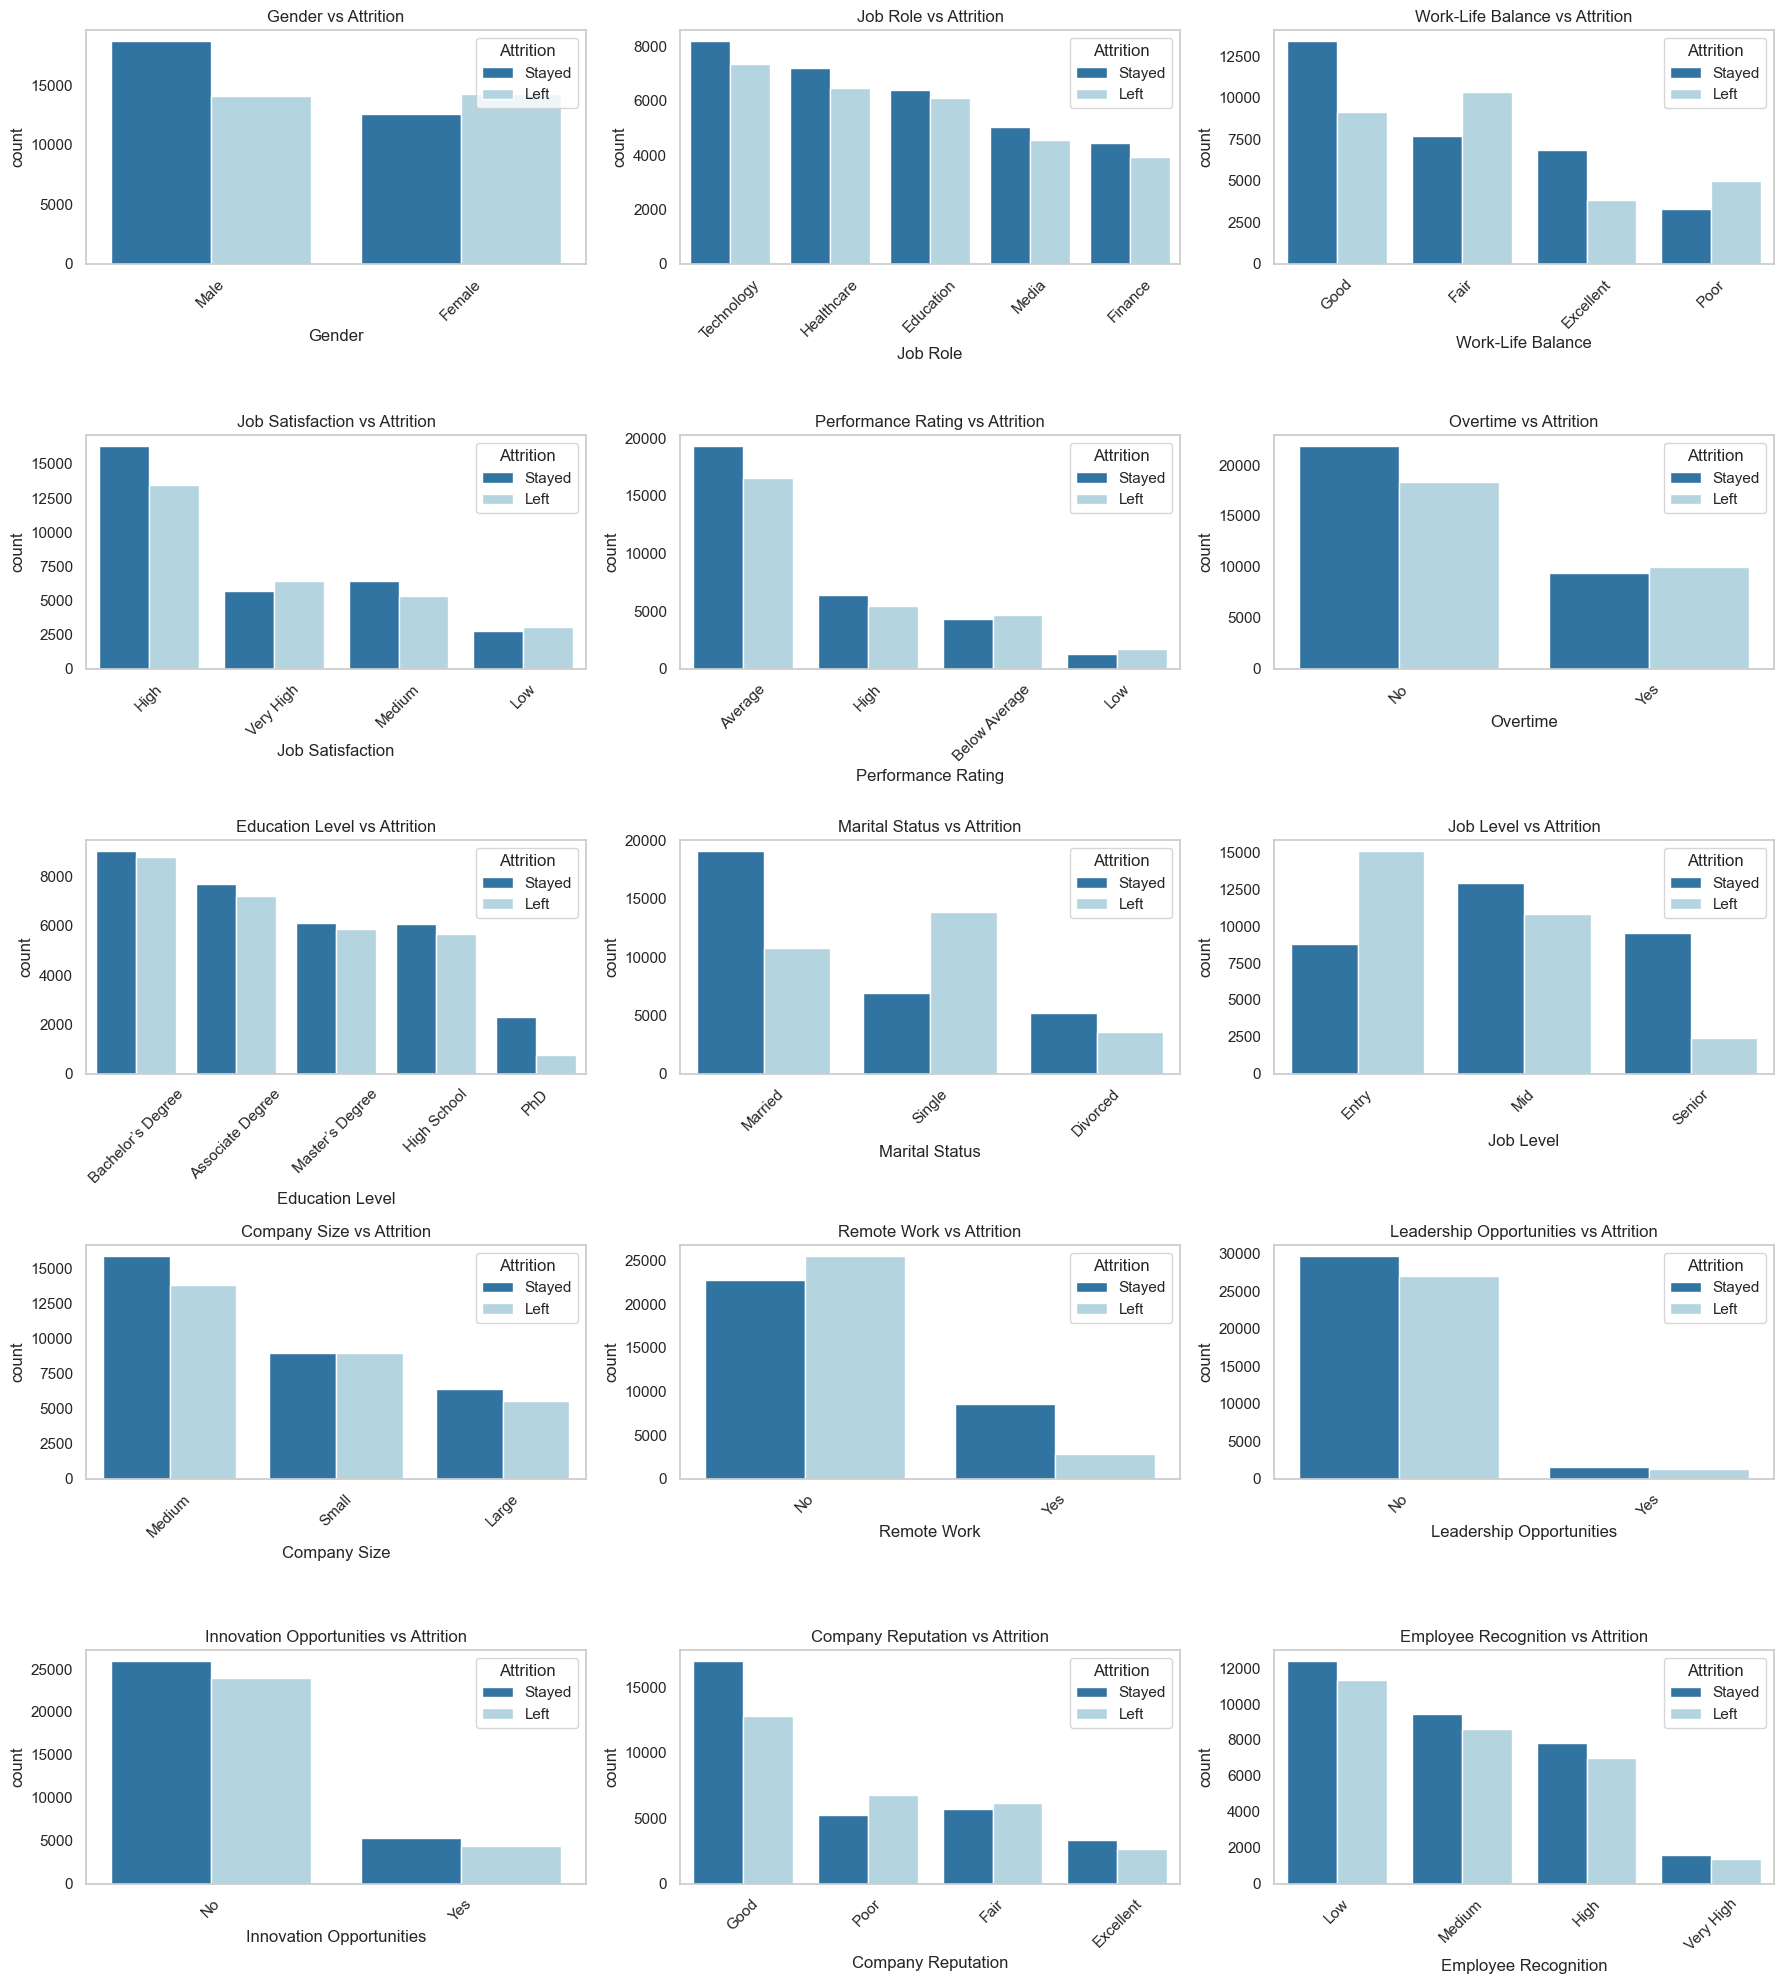

In [14]:
# Step 2.6: Compare categorical features with Attrition
fig, axes = plt.subplots(5, 3, figsize=(18,20))
axes = axes.flatten()

custom_palette = ["tab:blue", "lightblue"]
for i, col in enumerate(cat_features):
    sns.countplot(data=train_df, x=col, hue="Attrition", ax=axes[i],
                  order=train_df[col].value_counts().index, palette=custom_palette)
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(False)

plt.tight_layout()
plt.show()

## Correlation heatmap of numerical features

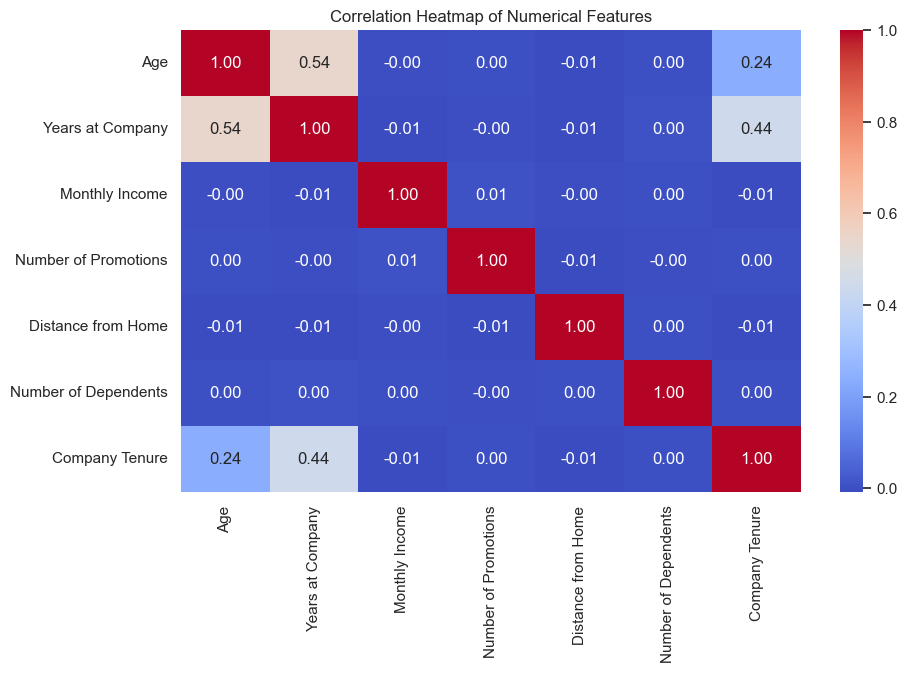

In [15]:
# Correlation heatmap
plt.figure(figsize=(10,6))
corr = train_df[num_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Attrition by Age groups, Income groups, Company tenure

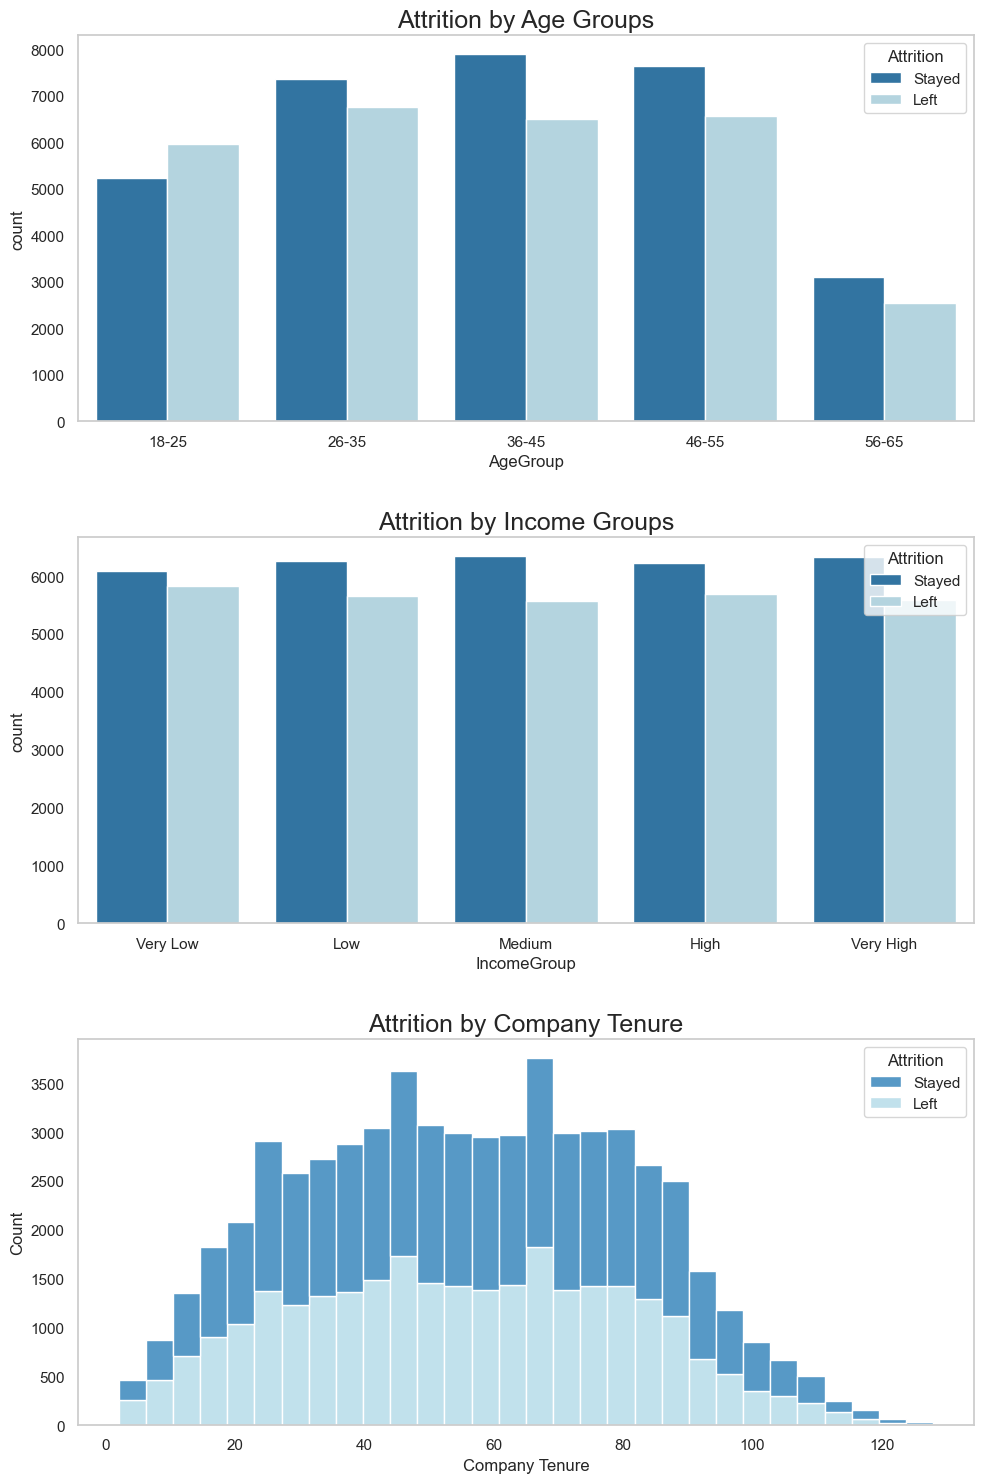

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10,15))

# Attrition by Age groups
train_df["AgeGroup"] = pd.cut(
    train_df["Age"], 
    bins=[17,25,35,45,55,65], 
    labels=["18-25","26-35","36-45","46-55","56-65"]
)
sns.countplot(data=train_df, x="AgeGroup", hue="Attrition", ax=axes[0], palette=["tab:blue", "lightblue"])
axes[0].set_title("Attrition by Age Groups", fontsize=18)
axes[0].grid(False)

# Attrition by Income groups
train_df["IncomeGroup"] = pd.qcut(
    train_df["Monthly Income"], q=5, 
    labels=["Very Low","Low","Medium","High","Very High"]
)
sns.countplot(data=train_df, x="IncomeGroup", hue="Attrition", ax=axes[1], palette=["tab:blue", "lightblue"])
axes[1].set_title("Attrition by Income Groups", fontsize=18)
axes[1].grid(False)

# Attrition by Tenure
sns.histplot(
    data=train_df, x="Company Tenure", hue="Attrition", 
    bins=30, kde=False, multiple="stack", ax=axes[2], palette=["tab:blue", "lightblue"]
)
axes[2].set_title("Attrition by Company Tenure", fontsize=18)
axes[2].grid(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


# Data Preprocessing

In [11]:
# Drop unique identifier
train_df = train_df.drop(columns=["Employee ID"])
test_df  = test_df.drop(columns=["Employee ID"])

# Remove EDA-only columns (AgeGroup, IncomeGroup) if they exist
cols_to_remove = ["AgeGroup", "IncomeGroup"]
train_df = train_df.drop(columns=[c for c in cols_to_remove if c in train_df.columns], errors="ignore")
test_df  = test_df.drop(columns=[c for c in cols_to_remove if c in test_df.columns], errors="ignore")

In [12]:
# Check missing values
print("Train missing values:\n", train_df.isnull().sum())
print("\nTest missing values:\n", test_df.isnull().sum())

Train missing values:
 Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Test missing values:
 Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of P

In [13]:
# Remove duplicate rows
print("Duplicates in train:", train_df.duplicated().sum())
print("Duplicates in test :", test_df.duplicated().sum())

Duplicates in train: 0
Duplicates in test : 0


In [14]:
# Outlier handling using percentile capping (1st & 99th percentile)
num_features = ['Age', 'Years at Company', 'Monthly Income', 
                'Number of Promotions', 'Distance from Home', 
                'Number of Dependents', 'Company Tenure']

for col in num_features:
    lower = train_df[col].quantile(0.01)
    upper = train_df[col].quantile(0.99)
    
    train_df[col] = np.clip(train_df[col], lower, upper)
    test_df[col]  = np.clip(test_df[col], lower, upper)

In [15]:
# Remove constant features
constant_cols = [col for col in train_df.columns if train_df[col].nunique() <= 1]

print("Constant columns:", constant_cols)

Constant columns: []


In [16]:
# Encode target Attrition (Stayed=0, Left=1)
label_map = {"Stayed": 0, "Left": 1}
train_df["Attrition"] = train_df["Attrition"].map(label_map)
test_df["Attrition"]  = test_df["Attrition"].map(label_map)
print(train_df["Attrition"].value_counts())

Attrition
0    31260
1    28338
Name: count, dtype: int64


In [17]:
# Define categorical feature groups
# 1. Ordinal features (with order)
ordinal_features = {
    "Work-Life Balance": ["Poor", "Fair", "Good", "Excellent"],
    "Job Satisfaction": ["Low", "Medium", "High", "Very High"],
    "Performance Rating": ["Low", "Average", "High", "Very High"],
    "Education Level": ["Below College", "College", "Bachelor", "Master", "Doctor"],
    "Job Level": ["Entry", "Mid", "Senior", "Lead", "Executive"]
}
# 2. Nominal features → OHE
ohe_features = [
    "Gender", "Marital Status", "Overtime", "Remote Work",
    "Leadership Opportunities", "Innovation Opportunities",
    "Company Reputation", "Employee Recognition"
]
# 3. High-cardinality → Label Encoding
label_features = ["Job Role"]

In [18]:
# Ordinal Encoding
for col, order in ordinal_features.items():
    mapping = {cat: idx for idx, cat in enumerate(order)}
    train_df[col] = train_df[col].map(mapping).fillna(len(order))
    test_df[col]  = test_df[col].map(mapping).fillna(len(order))

In [19]:
# OHE for nominal features
train_df = pd.get_dummies(train_df, columns=ohe_features, drop_first=True)
test_df  = pd.get_dummies(test_df, columns=ohe_features, drop_first=True)

# Align train and test columns
train_df, test_df = train_df.align(test_df, join="left", axis=1, fill_value=0)


In [20]:
# Label Encoding for high-cardinality features
le = LabelEncoder()

for col in label_features:
    combined = pd.concat([train_df[col], test_df[col]], axis=0).astype(str)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col]  = le.transform(test_df[col].astype(str))

In [21]:
# Step Apply imputers safely

# 1. Numeric features (median imputer)
num_imputer = SimpleImputer(strategy="median")
train_df[num_features] = num_imputer.fit_transform(train_df[num_features])
test_df[num_features]  = num_imputer.transform(test_df[num_features])

# 2. Object/string features (most_frequent imputer)
obj_cols = train_df.select_dtypes(include=["object"]).columns.tolist()

if obj_cols:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    train_df[obj_cols] = cat_imputer.fit_transform(train_df[obj_cols])
    test_df[obj_cols]  = cat_imputer.transform(test_df[obj_cols])

In [22]:
# Standardize numerical features
scaler = StandardScaler()
train_df[num_features] = scaler.fit_transform(train_df[num_features])
test_df[num_features]  = scaler.transform(test_df[num_features])

In [23]:
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

print("\nProcessed Train Head:")
display(train_df.head())

print("\nProcessed Test Head:")
display(test_df.head())

Train shape: (59598, 28)
Test shape : (14900, 28)

Processed Train Head:


,Age,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,...,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,-0.626336,0.291243,0,-0.897129,3,1,1.0,1.173308,-0.985017,5.0,...,False,False,False,False,False,False,False,False,True,False
1,1.691627,-1.047966,3,-0.829458,0,2,0.0,2.178351,-1.020186,5.0,...,False,False,False,False,True,False,False,True,False,False
2,-1.205827,-0.512283,2,0.404130,2,2,0.0,-0.836777,-1.371877,5.0,...,False,False,False,False,False,False,True,True,False,False
3,-0.212414,-0.780125,0,-1.555513,2,2,2.0,0.168266,-0.809171,5.0,...,False,True,False,False,False,True,False,False,True,False
4,1.443273,2.255416,0,-1.164524,1,3,1.0,-0.836777,0.738270,5.0,...,True,False,False,False,True,False,False,False,True,False



Processed Test Head:


,Age,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,...,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,-0.212414,-0.244441,2,0.343038,3,2,1.0,0.168266,1.160299,5.0,...,True,False,False,False,False,False,True,False,True,False
1,-0.295199,-0.780125,0,-1.285768,2,2,1.0,0.168266,0.175564,5.0,...,True,False,False,False,False,True,False,False,False,False
2,0.946567,-0.780125,0,-0.806431,1,2,1.0,2.178351,-1.266370,5.0,...,True,False,False,True,False,True,False,True,False,False
3,1.608842,2.523258,3,-0.833688,1,3,2.0,-0.836777,-0.246465,5.0,...,True,False,False,False,False,False,True,True,False,False
4,0.035939,0.737646,0,-1.266501,2,2,1.0,-0.836777,-0.105789,5.0,...,True,True,False,False,False,True,False,False,False,False


# Feature Engineering

In [24]:
# Create new meaningful features

# 1. Promotion Rate = Promotions per year at company
train_df["PromotionRate"] = train_df["Number of Promotions"] / (train_df["Years at Company"] + 1)
test_df["PromotionRate"]  = test_df["Number of Promotions"] / (test_df["Years at Company"] + 1)

# 2. Income per dependent --> Financial load
train_df["IncomePerDependent"] = train_df["Monthly Income"] / (train_df["Number of Dependents"] + 1)
test_df["IncomePerDependent"]  = test_df["Monthly Income"] / (test_df["Number of Dependents"] + 1)

# 3. Age-to-tenure ratio --> Loyalty indicator
train_df["AgeTenureRatio"] = train_df["Company Tenure"] / (train_df["Age"] + 1)
test_df["AgeTenureRatio"]  = test_df["Company Tenure"] / (test_df["Age"] + 1)

In [25]:
print("Object dtype columns in train_df:", train_df.select_dtypes(include=["object"]).columns.tolist())

Object dtype columns in train_df: ['Company Size']


In [26]:
# Encode Company Size (ordinal)
company_size_order = {"Small": 0, "Medium": 1, "Large": 2}
train_df["Company Size"] = train_df["Company Size"].map(company_size_order)
test_df["Company Size"]  = test_df["Company Size"].map(company_size_order)

In [27]:
# Step 4.2.1: Interaction Features

# Overtime × Job Satisfaction (attrition risk if low satisfaction + high overtime)
train_df["Overtime_JobSat"] = train_df["Overtime_Yes"] * train_df["Job Satisfaction"]
test_df["Overtime_JobSat"]  = test_df["Overtime_Yes"] * test_df["Job Satisfaction"]

# Work-life balance × Overtime
train_df["WLB_Overtime"] = train_df["Work-Life Balance"] * train_df["Overtime_Yes"]
test_df["WLB_Overtime"]  = test_df["Work-Life Balance"] * test_df["Overtime_Yes"]

# Job Level × Monthly Income (income expectation gap)
train_df["JobLevel_Income"] = train_df["Job Level"] * train_df["Monthly Income"]
test_df["JobLevel_Income"]  = test_df["Job Level"] * test_df["Monthly Income"]

print("✅ Interaction features added")


✅ Interaction features added


In [28]:
# Step 4.2.2: Ratio Features

# Years at company relative to age (loyalty measure)
train_df["Tenure_Age_Ratio"] = train_df["Years at Company"] / (train_df["Age"] + 1)
test_df["Tenure_Age_Ratio"]  = test_df["Years at Company"] / (test_df["Age"] + 1)

# Financial load per dependent
train_df["Income_per_Dependent"] = train_df["Monthly Income"] / (train_df["Number of Dependents"] + 1)
test_df["Income_per_Dependent"]  = test_df["Monthly Income"] / (test_df["Number of Dependents"] + 1)

# Income fairness = Income / Job Level
train_df["Income_per_JobLevel"] = train_df["Monthly Income"] / (train_df["Job Level"] + 1)
test_df["Income_per_JobLevel"]  = test_df["Monthly Income"] / (test_df["Job Level"] + 1)

print("✅ Ratio features added")


✅ Ratio features added


In [29]:
# Step 4.2.3: Group-Statistics Features (using training data only to avoid leakage)

# Attrition rate by Job Role
jobrole_attrition = train_df.groupby("Job Role")["Attrition"].mean().to_dict()
train_df["JobRole_AttritionRate"] = train_df["Job Role"].map(jobrole_attrition)
test_df["JobRole_AttritionRate"]  = test_df["Job Role"].map(jobrole_attrition).fillna(train_df["Attrition"].mean())

# Attrition rate by Education Level
edu_attrition = train_df.groupby("Education Level")["Attrition"].mean().to_dict()
train_df["Edu_AttritionRate"] = train_df["Education Level"].map(edu_attrition)
test_df["Edu_AttritionRate"]  = test_df["Education Level"].map(edu_attrition).fillna(train_df["Attrition"].mean())

# Attrition rate by Job Level
joblevel_attrition = train_df.groupby("Job Level")["Attrition"].mean().to_dict()
train_df["JobLevel_AttritionRate"] = train_df["Job Level"].map(joblevel_attrition)
test_df["JobLevel_AttritionRate"]  = test_df["Job Level"].map(joblevel_attrition).fillna(train_df["Attrition"].mean())

print("✅ Group-statistics features added")


✅ Group-statistics features added


In [30]:
# Fixed Step 4.2.4: Binning Features

# Age bands (fixed with include_lowest=True, right=True)
train_df["AgeBand"] = pd.cut(train_df["Age"], 
                             bins=[17,25,35,45,55,65], 
                             labels=[1,2,3,4,5], 
                             include_lowest=True, right=True)

test_df["AgeBand"] = pd.cut(test_df["Age"], 
                            bins=[17,25,35,45,55,65], 
                            labels=[1,2,3,4,5], 
                            include_lowest=True, right=True)

# Income bands (quartiles)
train_df["IncomeBand"] = pd.qcut(train_df["Monthly Income"], q=4, labels=[1,2,3,4])
test_df["IncomeBand"]  = pd.qcut(test_df["Monthly Income"], q=4, labels=[1,2,3,4])

# Convert to numeric (models prefer numeric instead of category dtype)
train_df["AgeBand"] = train_df["AgeBand"].astype("float").fillna(-1)
test_df["AgeBand"]  = test_df["AgeBand"].astype("float").fillna(-1)

train_df["IncomeBand"] = train_df["IncomeBand"].astype("float").fillna(-1)
test_df["IncomeBand"]  = test_df["IncomeBand"].astype("float").fillna(-1)

print("✅ Fixed AgeBand & IncomeBand binning")


✅ Fixed AgeBand & IncomeBand binning


In [31]:
# Step 4.2.5: Verify new features
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

new_cols = ["Overtime_JobSat","WLB_Overtime","JobLevel_Income",
            "Tenure_Age_Ratio","Income_per_Dependent","Income_per_JobLevel",
            "JobRole_AttritionRate","Edu_AttritionRate","JobLevel_AttritionRate",
            "AgeBand","IncomeBand"]

print("\nNewly added features:")
print(new_cols)

display(train_df[new_cols].head())


Train shape: (59598, 42)
Test shape : (14900, 42)

Newly added features:
['Overtime_JobSat', 'WLB_Overtime', 'JobLevel_Income', 'Tenure_Age_Ratio', 'Income_per_Dependent', 'Income_per_JobLevel', 'JobRole_AttritionRate', 'Edu_AttritionRate', 'JobLevel_AttritionRate', 'AgeBand', 'IncomeBand']


,Overtime_JobSat,WLB_Overtime,JobLevel_Income,Tenure_Age_Ratio,Income_per_Dependent,Income_per_JobLevel,JobRole_AttritionRate,Edu_AttritionRate,JobLevel_AttritionRate,AgeBand,IncomeBand
0,0,0,-0.897129,0.779425,15.104407,-0.448565,0.487190,0.475486,0.455648,-1.0,1.0
1,0,0,-0.829458,-0.389343,-0.443791,-0.414729,0.474410,0.475486,0.455648,-1.0,1.0
2,0,0,0.404130,2.488898,0.216225,0.202065,0.473098,0.475486,0.455648,-1.0,3.0
3,0,0,-1.555513,-0.990527,-1.268543,-0.777756,0.487190,0.475486,0.455648,-1.0,1.0
4,3,1,-2.329048,0.923113,19.606368,-0.388175,0.487190,0.475486,0.203122,-1.0,1.0


In [32]:
# Remove multicollinear features (correlation > 0.9)

# Use only numeric columns for correlation
corr_matrix = train_df.select_dtypes(include=[np.number]).corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)

Highly correlated features to drop: ['Income_per_Dependent', 'Income_per_JobLevel', 'IncomeBand']


In [33]:
# Drop from both train and test
train_df = train_df.drop(columns=to_drop)
test_df  = test_df.drop(columns=to_drop)

In [34]:
# Step 4.5: Remove low variance features

X_numeric = train_df.drop(columns=["Attrition"]).select_dtypes(include=[np.number])

selector = VarianceThreshold(threshold=0.01)
selector.fit(X_numeric)

low_var_cols = X_numeric.columns[~selector.get_support()].tolist()
print("Low variance features to drop:", low_var_cols)

Low variance features to drop: ['Education Level', 'JobRole_AttritionRate', 'Edu_AttritionRate', 'AgeBand']


In [35]:
# Drop from both train and test
train_df = train_df.drop(columns=low_var_cols)
test_df  = test_df.drop(columns=low_var_cols)

In [36]:
# Final dataset check after feature engineering
print("Final train shape:", train_df.shape)
print("Final test shape :", test_df.shape)

print("\nProcessed Train Head:")
display(train_df.head())


Final train shape: (59598, 35)
Final test shape : (14900, 35)

Processed Train Head:


,Age,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Number of Dependents,...,Employee Recognition_Medium,Employee Recognition_Very High,PromotionRate,IncomePerDependent,AgeTenureRatio,Overtime_JobSat,WLB_Overtime,JobLevel_Income,Tenure_Age_Ratio,JobLevel_AttritionRate
0,-0.626336,0.291243,0,-0.897129,3,1,1.0,1.173308,-0.985017,-1.059395,...,True,False,0.908666,15.104407,3.526904,0,0,-0.897129,0.779425,0.455648
1,1.691627,-1.047966,3,-0.829458,0,2,0.0,2.178351,-1.020186,0.869027,...,False,False,-45.414084,-0.443791,-0.510887,0,0,-0.829458,-0.389343,0.455648
2,-1.205827,-0.512283,2,0.404130,2,2,0.0,-0.836777,-1.371877,0.869027,...,False,False,-1.715700,0.216225,-3.516706,0,0,0.404130,2.488898,0.455648
3,-0.212414,-0.780125,0,-1.555513,2,2,2.0,0.168266,-0.809171,0.226220,...,True,False,0.765279,-1.268543,-0.287759,0,0,-1.555513,-0.990527,0.455648
4,1.443273,2.255416,0,-1.164524,1,3,1.0,-0.836777,0.738270,-1.059395,...,True,False,-0.257041,19.606368,0.199002,3,1,-2.329048,0.923113,0.203122


In [37]:
# Missing values check
print("Missing values in train set:")
print(train_df.isnull().sum())

print("\nMissing values in test set:")
print(test_df.isnull().sum())

Missing values in train set:
Age                               0
Years at Company                  0
Job Role                          0
Monthly Income                    0
Work-Life Balance                 0
Job Satisfaction                  0
Performance Rating                0
Number of Promotions              0
Distance from Home                0
Number of Dependents              0
Job Level                         0
Company Size                      0
Company Tenure                    0
Attrition                         0
Gender_Male                       0
Marital Status_Married            0
Marital Status_Single             0
Overtime_Yes                      0
Remote Work_Yes                   0
Leadership Opportunities_Yes      0
Innovation Opportunities_Yes      0
Company Reputation_Fair           0
Company Reputation_Good           0
Company Reputation_Poor           0
Employee Recognition_Low          0
Employee Recognition_Medium       0
Employee Recognition_Very High    0

In [38]:
# Basic info about datasets
print("Train dataset info:")
train_df.info()

print("\nTest dataset info:")
test_df.info()

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             59598 non-null  float64
 1   Years at Company                59598 non-null  float64
 2   Job Role                        59598 non-null  int64  
 3   Monthly Income                  59598 non-null  float64
 4   Work-Life Balance               59598 non-null  int64  
 5   Job Satisfaction                59598 non-null  int64  
 6   Performance Rating              59598 non-null  float64
 7   Number of Promotions            59598 non-null  float64
 8   Distance from Home              59598 non-null  float64
 9   Number of Dependents            59598 non-null  float64
 10  Job Level                       59598 non-null  int64  
 11  Company Size                    59598 non-null  int64  
 12  Company Tenu

# Model Building & Evaluation

## Train-Validation Split

In [39]:
# Train-Validation Split

from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["Attrition"])
y = train_df["Attrition"]

# Train-Validation Split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Check class balance
print("Train set class distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nValidation set class distribution:")
print(y_val.value_counts(normalize=True) * 100)

print("\nShapes:")
print("X_train:", X_train.shape, "X_val:", X_val.shape)


Train set class distribution:
Attrition
0    52.451865
1    47.548135
Name: proportion, dtype: float64

Validation set class distribution:
Attrition
0    52.449664
1    47.550336
Name: proportion, dtype: float64

Shapes:
X_train: (47678, 34) X_val: (11920, 34)


## Logistic Regression

Logistic Regression Baseline Performance
Accuracy:  0.7372
Precision: 0.7156
Recall:    0.7426
F1-score:  0.7288
ROC-AUC:   0.8281

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      6252
           1       0.72      0.74      0.73      5668

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



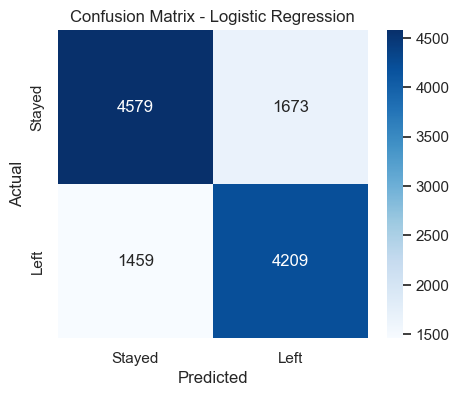

In [40]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_val_pred = log_reg.predict(X_val)
y_val_prob = log_reg.predict_proba(X_val)[:,1]

# Evaluation metrics
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc = roc_auc_score(y_val, y_val_prob)

print("Logistic Regression Baseline Performance")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## Decision Tree

🔹 Decision Tree Baseline Performance
Accuracy:  0.6646
Precision: 0.6446
Recall:    0.6568
F1-score:  0.6506
ROC-AUC:   0.6642

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      6252
           1       0.64      0.66      0.65      5668

    accuracy                           0.66     11920
   macro avg       0.66      0.66      0.66     11920
weighted avg       0.66      0.66      0.66     11920



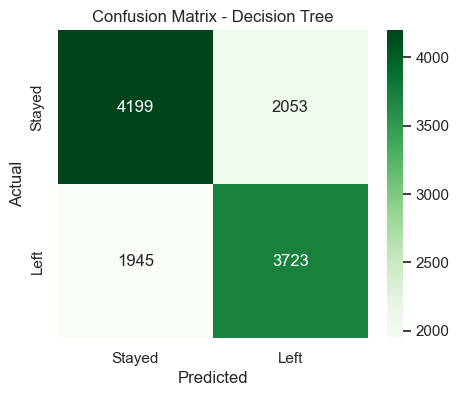

In [41]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Train
dt_clf.fit(X_train, y_train)

# Predictions
y_val_pred_dt = dt_clf.predict(X_val)
y_val_prob_dt = dt_clf.predict_proba(X_val)[:,1]

# Evaluation metrics
acc_dt = accuracy_score(y_val, y_val_pred_dt)
prec_dt = precision_score(y_val, y_val_pred_dt)
rec_dt = recall_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt)
roc_dt = roc_auc_score(y_val, y_val_prob_dt)

print("🔹 Decision Tree Baseline Performance")
print(f"Accuracy:  {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall:    {rec_dt:.4f}")
print(f"F1-score:  {f1_dt:.4f}")
print(f"ROC-AUC:   {roc_dt:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_val, y_val_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.title("Confusion Matrix - Decision Tree")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [42]:
# Store results for comparison
results = []
results.append({
    "Model": "Logistic Regression",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1": f1,
    "ROC-AUC": roc
})
results.append({
    "Model": "Decision Tree",
    "Accuracy": acc_dt,
    "Precision": prec_dt,
    "Recall": rec_dt,
    "F1": f1_dt,
    "ROC-AUC": roc_dt
})

import pandas as pd
results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.737248,0.715573,0.742590,0.728831,0.828125
1,Decision Tree,0.664597,0.644564,0.656845,0.650647,0.664235


## Random Forest

Random Forest Baseline Performance
Accuracy:  0.7372
Precision: 0.7277
Recall:    0.7149
F1-score:  0.7213
ROC-AUC:   0.8279

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      6252
           1       0.73      0.71      0.72      5668

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



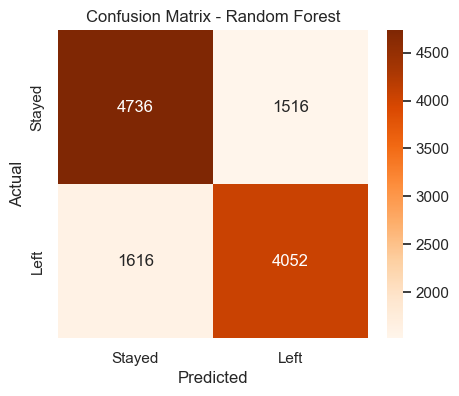

In [43]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest 
rf_clf = RandomForestClassifier(
    n_estimators=100,       
    random_state=42,
    class_weight="balanced", 
    n_jobs=-1                
)

# Train
rf_clf.fit(X_train, y_train)

# Predictions
y_val_pred_rf = rf_clf.predict(X_val)
y_val_prob_rf = rf_clf.predict_proba(X_val)[:,1]

# Evaluation metrics
acc_rf = accuracy_score(y_val, y_val_pred_rf)
prec_rf = precision_score(y_val, y_val_pred_rf)
rec_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)
roc_rf = roc_auc_score(y_val, y_val_prob_rf)

print("Random Forest Baseline Performance")
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1-score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_rf:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [44]:
# Add results to comparison table
results.append({
    "Model": "Random Forest",
    "Accuracy": acc_rf,
    "Precision": prec_rf,
    "Recall": rec_rf,
    "F1": f1_rf,
    "ROC-AUC": roc_rf
})

results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.737248,0.715573,0.742590,0.728831,0.828125
1,Decision Tree,0.664597,0.644564,0.656845,0.650647,0.664235
2,Random Forest,0.737248,0.727730,0.714891,0.721253,0.827892


## XGBoost

XGBoost Baseline Performance
Accuracy:  0.7466
Precision: 0.7335
Recall:    0.7334
F1-score:  0.7335
ROC-AUC:   0.8383

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6252
           1       0.73      0.73      0.73      5668

    accuracy                           0.75     11920
   macro avg       0.75      0.75      0.75     11920
weighted avg       0.75      0.75      0.75     11920



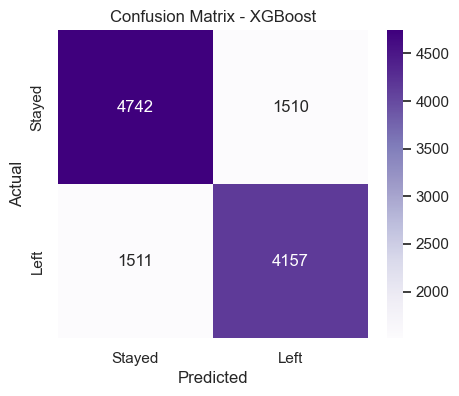

In [45]:
# XGBoost Classifier

from xgboost import XGBClassifier

# Initialize XGBoost 
xgb_clf = XGBClassifier(
    n_estimators=200,       
    learning_rate=0.1,      
    max_depth=6,            
    subsample=0.8,          
    colsample_bytree=0.8,  
    random_state=42,
    eval_metric="logloss",  
    n_jobs=-1
)

# Train
xgb_clf.fit(X_train, y_train)

# Predictions
y_val_pred_xgb = xgb_clf.predict(X_val)
y_val_prob_xgb = xgb_clf.predict_proba(X_val)[:,1]

# Evaluation metrics
acc_xgb = accuracy_score(y_val, y_val_pred_xgb)
prec_xgb = precision_score(y_val, y_val_pred_xgb)
rec_xgb = recall_score(y_val, y_val_pred_xgb)
f1_xgb = f1_score(y_val, y_val_pred_xgb)
roc_xgb = roc_auc_score(y_val, y_val_prob_xgb)

print("XGBoost Baseline Performance")
print(f"Accuracy:  {acc_xgb:.4f}")
print(f"Precision: {prec_xgb:.4f}")
print(f"Recall:    {rec_xgb:.4f}")
print(f"F1-score:  {f1_xgb:.4f}")
print(f"ROC-AUC:   {roc_xgb:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples", xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.title("Confusion Matrix - XGBoost")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [46]:
# Add results to comparison table
results.append({
    "Model": "XGBoost",
    "Accuracy": acc_xgb,
    "Precision": prec_xgb,
    "Recall": rec_xgb,
    "F1": f1_xgb,
    "ROC-AUC": roc_xgb
})

results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.737248,0.715573,0.742590,0.728831,0.828125
1,Decision Tree,0.664597,0.644564,0.656845,0.650647,0.664235
2,Random Forest,0.737248,0.727730,0.714891,0.721253,0.827892
3,XGBoost,0.746560,0.733545,0.733416,0.733480,0.838294


## LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22670, number of negative: 25008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1871
[LightGBM] [Info] Number of data points in the train set: 47678, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Baseline Performance
Accuracy:  0.7485
Precision: 0.7257
Recall:    0.7574
F1-score:  0.7412
ROC-AUC:   0.8412

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      6252
           1       0.73      0.76      0.74      5668

    accuracy                           0.75     11920
  

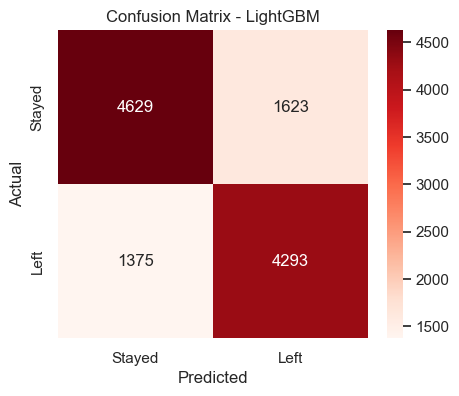

In [47]:
# LightGBM Classifier

from lightgbm import LGBMClassifier

# Initialize LightGBM 
lgbm_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,        
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

# Train
lgbm_clf.fit(X_train, y_train)

# Predictions
y_val_pred_lgbm = lgbm_clf.predict(X_val)
y_val_prob_lgbm = lgbm_clf.predict_proba(X_val)[:,1]

# Evaluation metrics
acc_lgbm = accuracy_score(y_val, y_val_pred_lgbm)
prec_lgbm = precision_score(y_val, y_val_pred_lgbm)
rec_lgbm = recall_score(y_val, y_val_pred_lgbm)
f1_lgbm = f1_score(y_val, y_val_pred_lgbm)
roc_lgbm = roc_auc_score(y_val, y_val_prob_lgbm)

print("LightGBM Baseline Performance")
print(f"Accuracy:  {acc_lgbm:.4f}")
print(f"Precision: {prec_lgbm:.4f}")
print(f"Recall:    {rec_lgbm:.4f}")
print(f"F1-score:  {f1_lgbm:.4f}")
print(f"ROC-AUC:   {roc_lgbm:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lgbm))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_val, y_val_pred_lgbm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Reds", xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.title("Confusion Matrix - LightGBM")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [48]:
# Add results to comparison table
results.append({
    "Model": "LightGBM",
    "Accuracy": acc_lgbm,
    "Precision": prec_lgbm,
    "Recall": rec_lgbm,
    "F1": f1_lgbm,
    "ROC-AUC": roc_lgbm
})

results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.737248,0.715573,0.742590,0.728831,0.828125
1,Decision Tree,0.664597,0.644564,0.656845,0.650647,0.664235
2,Random Forest,0.737248,0.727730,0.714891,0.721253,0.827892
3,XGBoost,0.746560,0.733545,0.733416,0.733480,0.838294
4,LightGBM,0.748490,0.725659,0.757410,0.741195,0.841207


In [49]:
# Step 6.1.1: Imports & CV setup
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make LGBM-specific copies with underscore column names to remove whitespace warnings
X_train_lgbm = X_train.copy()
X_val_lgbm   = X_val.copy()
X_train_lgbm.columns = X_train_lgbm.columns.str.replace(" ", "_")
X_val_lgbm.columns   = X_val_lgbm.columns.str.replace(" ", "_")

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [50]:
# Step 6.1.2: Define the hyperparameter search space for LightGBM
param_dist = {
    "n_estimators":       [300, 500, 800, 1000, 1200],
    "learning_rate":      np.linspace(0.02, 0.2, 10),
    "max_depth":          [-1, 4, 5, 6, 7, 8, 10],
    "num_leaves":         [15, 31, 63, 95, 127, 191],
    "min_child_samples":  [10, 20, 30, 50, 70, 100],
    "subsample":          np.linspace(0.6, 1.0, 5),       # bagging
    "colsample_bytree":   np.linspace(0.6, 1.0, 5),       # feature sampling
    "reg_alpha":          [0, 0.1, 0.5, 1.0, 2.0],
    "reg_lambda":         [0, 0.1, 0.5, 1.0, 2.0],
}

base_lgbm = LGBMClassifier(
    objective="binary",
    random_state=42,
    n_jobs=-1,
    class_weight=None  # dataset is almost balanced; we'll let the search focus on other knobs
)


In [51]:
# Step 6.1.3: Run RandomizedSearchCV optimizing F1-score
search_lgbm = RandomizedSearchCV(
    estimator=base_lgbm,
    param_distributions=param_dist,
    n_iter=30,                 # increase (e.g., 60–100) if you want to push harder
    scoring="f1",
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    refit=True
)

search_lgbm.fit(X_train_lgbm, y_train)

print("Best F1 (CV):", search_lgbm.best_score_)
print("Best Params:", search_lgbm.best_params_)
best_lgbm = search_lgbm.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 22670, number of negative: 25008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1871
[LightGBM] [Info] Number of data points in the train set: 47678, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475481 -> initscore=-0.098153
[LightGBM] [Info] Start training from score -0.098153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

🔹 LightGBM (TUNED) Validation Performance
Accuracy:  0.7492
Precision: 0.7378
Recall:    0.7329
F1-score:  0.7354
ROC-AUC:   0.8433

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6252
           1       0.74      0.73      0.74      5668

    accuracy                           0.75     11920
   macro avg       0.75      0.75      0.75     11920
weighted avg       0.75      0.75      0.75     11920



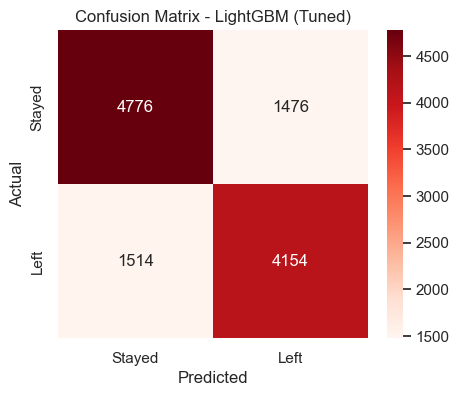

In [52]:
# Step 6.1.4: Evaluate the tuned model on the validation set
y_val_pred_lgbm_tuned = best_lgbm.predict(X_val_lgbm)
y_val_prob_lgbm_tuned = best_lgbm.predict_proba(X_val_lgbm)[:, 1]

acc_lgbm_t = accuracy_score(y_val, y_val_pred_lgbm_tuned)
prec_lgbm_t = precision_score(y_val, y_val_pred_lgbm_tuned)
rec_lgbm_t = recall_score(y_val, y_val_pred_lgbm_tuned)
f1_lgbm_t = f1_score(y_val, y_val_pred_lgbm_tuned)
roc_lgbm_t = roc_auc_score(y_val, y_val_prob_lgbm_tuned)

print("🔹 LightGBM (TUNED) Validation Performance")
print(f"Accuracy:  {acc_lgbm_t:.4f}")
print(f"Precision: {prec_lgbm_t:.4f}")
print(f"Recall:    {rec_lgbm_t:.4f}")
print(f"F1-score:  {f1_lgbm_t:.4f}")
print(f"ROC-AUC:   {roc_lgbm_t:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lgbm_tuned))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred_lgbm_tuned)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.title("Confusion Matrix - LightGBM (Tuned)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [53]:
# Step 6.2.1: Imports & prep for XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make XGB-specific copies with underscore column names (safer feature names)
X_train_xgb = X_train.copy()
X_val_xgb   = X_val.copy()
X_train_xgb.columns = X_train_xgb.columns.str.replace(" ", "_")
X_val_xgb.columns   = X_val_xgb.columns.str.replace(" ", "_")

# Stratified CV
cv_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [54]:
# Step 6.2.2: XGBoost search space & base model

param_dist_xgb = {
    "n_estimators":      [300, 500, 800, 1000, 1200],
    "learning_rate":     np.linspace(0.02, 0.2, 10),
    "max_depth":         [3, 4, 5, 6, 7, 8],
    "min_child_weight":  [1, 3, 5, 7, 10],
    "subsample":         np.linspace(0.6, 1.0, 5),
    "colsample_bytree":  np.linspace(0.6, 1.0, 5),
    "gamma":             [0, 0.1, 0.3, 0.5, 1.0],
    "reg_alpha":         [0, 0.1, 0.5, 1.0, 2.0],
    "reg_lambda":        [0.5, 1.0, 2.0, 5.0]
    # "scale_pos_weight": [1]  # dataset ~balanced; keep 1
}

base_xgb = XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"  # avoids label encoder warning
)


In [55]:
# Step 6.2.3: RandomizedSearchCV optimizing F1
search_xgb = RandomizedSearchCV(
    estimator=base_xgb,
    param_distributions=param_dist_xgb,
    n_iter=30,                 # increase (e.g., 60–100) to push further if needed
    scoring="f1",
    cv=cv_xgb,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    refit=True
)

search_xgb.fit(X_train_xgb, y_train)

print("Best F1 (CV):", search_xgb.best_score_)
print("Best Params:", search_xgb.best_params_)
best_xgb = search_xgb.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best F1 (CV): 0.7393425210290492
Best Params: {'subsample': np.float64(0.7), 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': np.float64(0.10000000000000002), 'gamma': 0.5, 'colsample_bytree': np.float64(1.0)}


🔹 XGBoost (TUNED) Validation Performance
Accuracy:  0.7497
Precision: 0.7378
Recall:    0.7348
F1-score:  0.7363
ROC-AUC:   0.8434

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6252
           1       0.74      0.73      0.74      5668

    accuracy                           0.75     11920
   macro avg       0.75      0.75      0.75     11920
weighted avg       0.75      0.75      0.75     11920



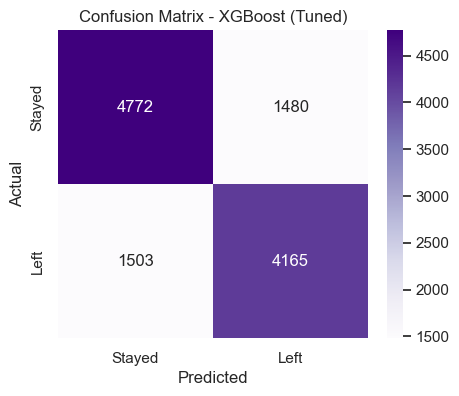

In [56]:
# Step 6.2.4: Validation performance of tuned XGBoost
y_val_pred_xgb_tuned = best_xgb.predict(X_val_xgb)
y_val_prob_xgb_tuned = best_xgb.predict_proba(X_val_xgb)[:, 1]

acc_xgb_t  = accuracy_score(y_val, y_val_pred_xgb_tuned)
prec_xgb_t = precision_score(y_val, y_val_pred_xgb_tuned)
rec_xgb_t  = recall_score(y_val, y_val_pred_xgb_tuned)
f1_xgb_t   = f1_score(y_val, y_val_pred_xgb_tuned)
roc_xgb_t  = roc_auc_score(y_val, y_val_prob_xgb_tuned)

print("🔹 XGBoost (TUNED) Validation Performance")
print(f"Accuracy:  {acc_xgb_t:.4f}")
print(f"Precision: {prec_xgb_t:.4f}")
print(f"Recall:    {rec_xgb_t:.4f}")
print(f"F1-score:  {f1_xgb_t:.4f}")
print(f"ROC-AUC:   {roc_xgb_t:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_xgb_tuned))

# Confusion Matrix
cm_xgb_t = confusion_matrix(y_val, y_val_pred_xgb_tuned)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb_t, annot=True, fmt="d", cmap="Purples", xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [57]:
# Step 6.2.5: Append tuned XGBoost result to the results table
results.append({
    "Model": "XGBoost (tuned)",
    "Accuracy": acc_xgb_t,
    "Precision": prec_xgb_t,
    "Recall": rec_xgb_t,
    "F1": f1_xgb_t,
    "ROC-AUC": roc_xgb_t
})

results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False).reset_index(drop=True)
display(results_df)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,LightGBM,0.748490,0.725659,0.757410,0.741195,0.841207
1,XGBoost (tuned),0.749748,0.737821,0.734827,0.736321,0.843400
2,XGBoost,0.746560,0.733545,0.733416,0.733480,0.838294
3,Logistic Regression,0.737248,0.715573,0.742590,0.728831,0.828125
4,Random Forest,0.737248,0.727730,0.714891,0.721253,0.827892
5,Decision Tree,0.664597,0.644564,0.656845,0.650647,0.664235


In [58]:
# Step 7.1.1: Function to evaluate thresholds
def optimize_threshold(y_true, y_probs, model_name="Model"):
    thresholds = np.linspace(0.1, 0.9, 81)  # step = 0.01
    precisions, recalls, f1s = [], [], []
    
    for t in thresholds:
        y_pred_t = (y_probs >= t).astype(int)
        precisions.append(precision_score(y_true, y_pred_t))
        recalls.append(recall_score(y_true, y_pred_t))
        f1s.append(f1_score(y_true, y_pred_t))
    
    best_idx = np.argmax(f1s)
    best_threshold = thresholds[best_idx]
    best_f1 = f1s[best_idx]
    
    print(f"🔹 {model_name} Best Threshold: {best_threshold:.2f}")
    print(f"   Precision: {precisions[best_idx]:.4f}")
    print(f"   Recall:    {recalls[best_idx]:.4f}")
    print(f"   F1-score:  {best_f1:.4f}")
    
    # Plot F1 vs Threshold
    plt.figure(figsize=(8,5))
    plt.plot(thresholds, f1s, label="F1-score", color="blue")
    plt.plot(thresholds, precisions, label="Precision", color="green", linestyle="--")
    plt.plot(thresholds, recalls, label="Recall", color="red", linestyle="--")
    plt.axvline(best_threshold, color="black", linestyle=":")
    plt.title(f"{model_name} - Threshold Optimization")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    
    return best_threshold, precisions[best_idx], recalls[best_idx], best_f1


🔹 LightGBM (tuned) Best Threshold: 0.32
   Precision: 0.6558
   Recall:    0.8989
   F1-score:  0.7584


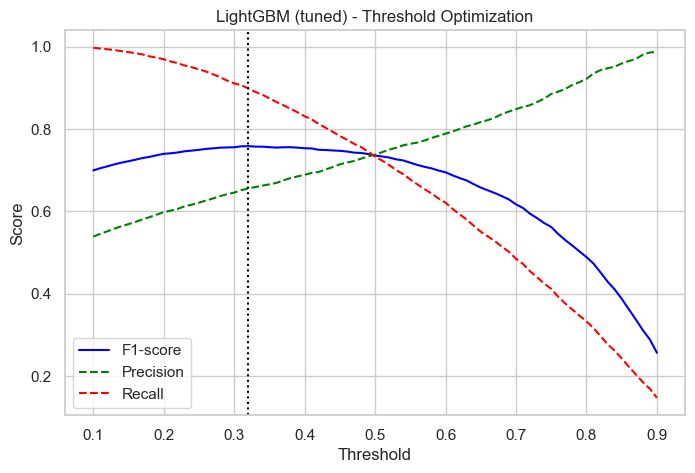

In [59]:
# Step 7.1.2: LightGBM tuned - threshold optimization
best_thr_lgbm, best_prec_lgbm, best_rec_lgbm, best_f1_lgbm = optimize_threshold(
    y_val, y_val_prob_lgbm_tuned, model_name="LightGBM (tuned)"
)

🔹 XGBoost (tuned) Best Threshold: 0.32
   Precision: 0.6625
   Recall:    0.8821
   F1-score:  0.7567


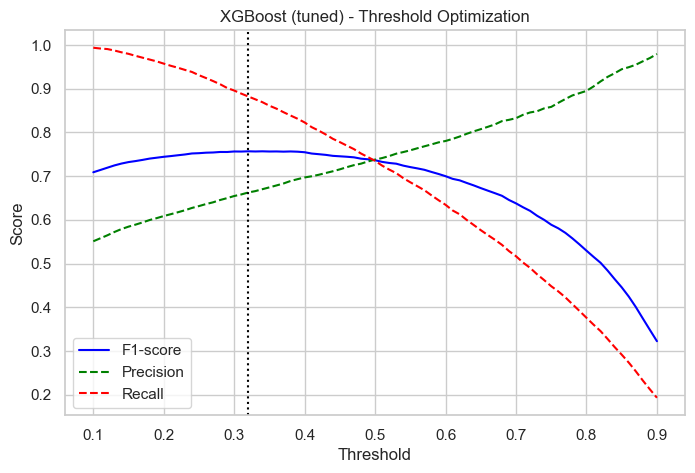

In [60]:
# Step 7.1.3: XGBoost tuned - threshold optimization
best_thr_xgb, best_prec_xgb, best_rec_xgb, best_f1_xgb = optimize_threshold(
    y_val, y_val_prob_xgb_tuned, model_name="XGBoost (tuned)"
)

In [61]:
# Step 7.1.4: Append results to leaderboard
results.append({
    "Model": "LightGBM (tuned + thr)",
    "Accuracy": accuracy_score(y_val, (y_val_prob_lgbm_tuned >= best_thr_lgbm).astype(int)),
    "Precision": best_prec_lgbm,
    "Recall": best_rec_lgbm,
    "F1": best_f1_lgbm,
    "ROC-AUC": roc_auc_score(y_val, y_val_prob_lgbm_tuned)
})

results.append({
    "Model": "XGBoost (tuned + thr)",
    "Accuracy": accuracy_score(y_val, (y_val_prob_xgb_tuned >= best_thr_xgb).astype(int)),
    "Precision": best_prec_xgb,
    "Recall": best_rec_xgb,
    "F1": best_f1_xgb,
    "ROC-AUC": roc_auc_score(y_val, y_val_prob_xgb_tuned)
})

results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False).reset_index(drop=True)
display(results_df)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,LightGBM (tuned + thr),0.727601,0.655812,0.898906,0.758354,0.843346
1,XGBoost (tuned + thr),0.730285,0.662515,0.882145,0.756716,0.843400
2,LightGBM,0.748490,0.725659,0.757410,0.741195,0.841207
3,XGBoost (tuned),0.749748,0.737821,0.734827,0.736321,0.843400
4,XGBoost,0.746560,0.733545,0.733416,0.733480,0.838294
5,Logistic Regression,0.737248,0.715573,0.742590,0.728831,0.828125
6,Random Forest,0.737248,0.727730,0.714891,0.721253,0.827892
7,Decision Tree,0.664597,0.644564,0.656845,0.650647,0.664235


In [62]:
# Step 8.1: Prep copies with underscore names (safe for LGBM/XGB)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We assume these already exist from Step 6/7:
# best_lgbm, y_val_prob_lgbm_tuned
# best_xgb,  y_val_prob_xgb_tuned
# X_train, X_val, y_train, y_val

X_train_ens = X_train.copy()
X_val_ens   = X_val.copy()
X_train_ens.columns = X_train_ens.columns.str.replace(" ", "_")
X_val_ens.columns   = X_val_ens.columns.str.replace(" ", "_")

# Also train a fresh Logistic Regression base model on the same features
log_base = LogisticRegression(max_iter=1000, random_state=42)
log_base.fit(X_train_ens, y_train)

# Convenience function (we used earlier)
def optimize_threshold(y_true, y_probs, model_name="Model"):
    thresholds = np.linspace(0.1, 0.9, 81)
    precisions, recalls, f1s = [], [], []
    for t in thresholds:
        y_pred_t = (y_probs >= t).astype(int)
        precisions.append(precision_score(y_true, y_pred_t))
        recalls.append(recall_score(y_true, y_pred_t))
        f1s.append(f1_score(y_true, y_pred_t))
    best_idx = int(np.argmax(f1s))
    best_threshold = thresholds[best_idx]
    return best_threshold, precisions[best_idx], recalls[best_idx], f1s[best_idx]


In [63]:
# Step 8.2: Stacked Ensemble using sklearn's StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import clone

# Recreate unfitted clones with tuned params (StackingClassifier will refit them)
lgbm_params = best_lgbm.get_params()
xgb_params  = best_xgb.get_params()

lgbm_base = clone(best_lgbm.__class__(**lgbm_params))
xgb_base  = clone(best_xgb.__class__(**xgb_params))

stack = StackingClassifier(
    estimators=[
        ("lgbm", lgbm_base),
        ("xgb",  xgb_base),
        ("lr",   LogisticRegression(max_iter=1000, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    stack_method="predict_proba",   # pass probabilities to meta-learner
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    passthrough=False               # set True to pass original features as well (try later if needed)
)

stack.fit(X_train_ens, y_train)

# Validate
y_val_prob_stack = stack.predict_proba(X_val_ens)[:, 1]
y_val_pred_stack = (y_val_prob_stack >= 0.5).astype(int)

acc_s  = accuracy_score(y_val, y_val_pred_stack)
prec_s = precision_score(y_val, y_val_pred_stack)
rec_s  = recall_score(y_val, y_val_pred_stack)
f1_s   = f1_score(y_val, y_val_pred_stack)
roc_s  = roc_auc_score(y_val, y_val_prob_stack)

print("🔹 Stacking (default 0.5 threshold) Validation Performance")
print(f"Accuracy:  {acc_s:.4f}")
print(f"Precision: {prec_s:.4f}")
print(f"Recall:    {rec_s:.4f}")
print(f"F1-score:  {f1_s:.4f}")
print(f"ROC-AUC:   {roc_s:.4f}")


🔹 Stacking (default 0.5 threshold) Validation Performance
Accuracy:  0.7497
Precision: 0.7389
Recall:    0.7325
F1-score:  0.7357
ROC-AUC:   0.8437


In [64]:
# Step 8.3: Optimize threshold for the stacked model
best_thr_stack, best_prec_s, best_rec_s, best_f1_s = optimize_threshold(
    y_val, y_val_prob_stack, model_name="Stacked"
)

acc_best_s = accuracy_score(y_val, (y_val_prob_stack >= best_thr_stack).astype(int))

print(f"\n🔹 Stacking (tuned threshold) on Validation")
print(f"Best Threshold: {best_thr_stack:.2f}")
print(f"Accuracy:  {acc_best_s:.4f}")
print(f"Precision: {best_prec_s:.4f}")
print(f"Recall:    {best_rec_s:.4f}")
print(f"F1-score:  {best_f1_s:.4f}")
print(f"ROC-AUC:   {roc_s:.4f}")



🔹 Stacking (tuned threshold) on Validation
Best Threshold: 0.29
Accuracy:  0.7317
Precision: 0.6638
Recall:    0.8830
F1-score:  0.7579
ROC-AUC:   0.8437


In [65]:
# Step 8.4: Weighted blending of tuned LightGBM + XGBoost (+ optional LR)
# Get validation probabilities from all three base models
y_prob_lgbm = best_lgbm.predict_proba(X_val_ens)[:, 1]
y_prob_xgb  = best_xgb.predict_proba(X_val_ens)[:, 1]
y_prob_lr   = log_base.predict_proba(X_val_ens)[:, 1]

# Grid-search simple weights for best F1 after own threshold optimization
best_combo = None
best_f1_blend = -1
best_report = None

weights = np.linspace(0.0, 1.0, 21)  # 0.00 .. 1.00 step 0.05

for w1 in weights:      # weight for LGBM
    for w2 in weights:  # weight for XGB
        if w1 + w2 <= 1.0:
            w3 = 1.0 - (w1 + w2)     # remaining weight for LR
            y_prob_blend = (w1 * y_prob_lgbm) + (w2 * y_prob_xgb) + (w3 * y_prob_lr)
            thr, p, r, f1 = optimize_threshold(y_val, y_prob_blend, model_name="Blend")
            if f1 > best_f1_blend:
                best_f1_blend = f1
                best_combo = (w1, w2, w3, thr)
                best_report = (p, r, f1,
                               accuracy_score(y_val, (y_prob_blend >= thr).astype(int)),
                               roc_auc_score(y_val, y_prob_blend))

w1, w2, w3, thr = best_combo
prec_b, rec_b, f1_b, acc_b, roc_b = best_report

print("🔹 Best Weighted Blend (LGBM, XGB, LR)")
print(f"Weights -> LGBM: {w1:.2f}, XGB: {w2:.2f}, LR: {w3:.2f}")
print(f"Best Threshold: {thr:.2f}")
print(f"Accuracy:  {acc_b:.4f}")
print(f"Precision: {prec_b:.4f}")
print(f"Recall:    {rec_b:.4f}")
print(f"F1-score:  {f1_b:.4f}")
print(f"ROC-AUC:   {roc_b:.4f}")


🔹 Best Weighted Blend (LGBM, XGB, LR)
Weights -> LGBM: 0.80, XGB: 0.00, LR: 0.20
Best Threshold: 0.32
Accuracy:  0.7276
Precision: 0.6553
Recall:    0.9014
F1-score:  0.7589
ROC-AUC:   0.8430


In [66]:
# Step 8.5: Collect & display results
results.append({
    "Model": "Stacked (default 0.5)",
    "Accuracy": acc_s,
    "Precision": prec_s,
    "Recall": rec_s,
    "F1": f1_s,
    "ROC-AUC": roc_s
})

results.append({
    "Model": "Stacked (tuned thr)",
    "Accuracy": acc_best_s,
    "Precision": best_prec_s,
    "Recall": best_rec_s,
    "F1": best_f1_s,
    "ROC-AUC": roc_s
})

results.append({
    "Model": "Blend (best weights + thr)",
    "Accuracy": acc_b,
    "Precision": prec_b,
    "Recall": rec_b,
    "F1": f1_b,
    "ROC-AUC": roc_b
})

results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False).reset_index(drop=True)
display(results_df.head(10))


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Blend (best weights + thr),0.727601,0.655252,0.901376,0.758856,0.842992
1,LightGBM (tuned + thr),0.727601,0.655812,0.898906,0.758354,0.843346
2,Stacked (tuned thr),0.731711,0.663793,0.883028,0.757874,0.843668
3,XGBoost (tuned + thr),0.730285,0.662515,0.882145,0.756716,0.843400
4,LightGBM,0.748490,0.725659,0.757410,0.741195,0.841207
5,XGBoost (tuned),0.749748,0.737821,0.734827,0.736321,0.843400
6,Stacked (default 0.5),0.749748,0.738922,0.732534,0.735714,0.843668
7,XGBoost,0.746560,0.733545,0.733416,0.733480,0.838294
8,Logistic Regression,0.737248,0.715573,0.742590,0.728831,0.828125
9,Random Forest,0.737248,0.727730,0.714891,0.721253,0.827892


🔹 Stacking (passthrough, thr=0.5) Validation
Accuracy:  0.7497
Precision: 0.7384
Recall:    0.7334
F1-score:  0.7359
ROC-AUC:   0.8424


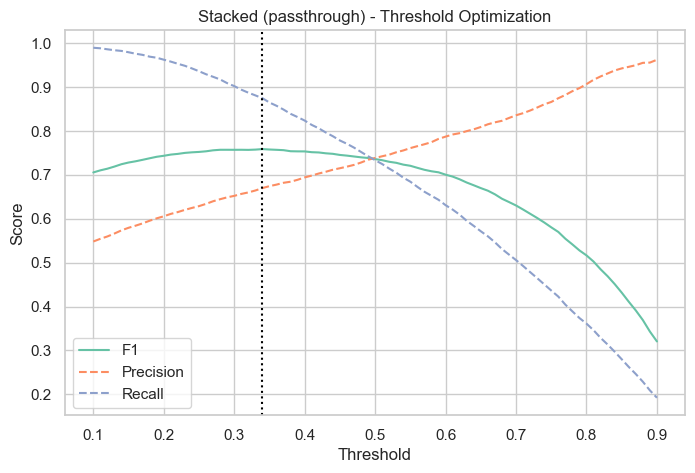


🔹 Stacking (passthrough + tuned thr) Validation
Best Threshold: 0.34
Accuracy:  0.7353
Precision: 0.6698
Recall:    0.8746
F1-score:  0.7586
ROC-AUC:   0.8424


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Blend (best weights + thr),0.727601,0.655252,0.901376,0.758856,0.842992
1,Stacked (passthrough + tuned thr),0.735319,0.669774,0.874559,0.758589,0.842388
2,LightGBM (tuned + thr),0.727601,0.655812,0.898906,0.758354,0.843346
3,Stacked (tuned thr),0.731711,0.663793,0.883028,0.757874,0.843668
4,XGBoost (tuned + thr),0.730285,0.662515,0.882145,0.756716,0.843400
5,LightGBM,0.748490,0.725659,0.757410,0.741195,0.841207
6,XGBoost (tuned),0.749748,0.737821,0.734827,0.736321,0.843400
7,"Stacked (passthrough, thr=0.5)",0.749664,0.738366,0.733416,0.735882,0.842388
8,Stacked (default 0.5),0.749748,0.738922,0.732534,0.735714,0.843668
9,XGBoost,0.746560,0.733545,0.733416,0.733480,0.838294


In [67]:
# Step 8.6.1: Stacking with passthrough=True + threshold tuning

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Safe feature names (underscores), as before
X_train_stack = X_train.copy()
X_val_stack   = X_val.copy()
X_train_stack.columns = X_train_stack.columns.str.replace(" ", "_")
X_val_stack.columns   = X_val_stack.columns.str.replace(" ", "_")

# Make sure we have the helper from earlier; redefine if needed
def optimize_threshold(y_true, y_probs, model_name="Model"):
    thresholds = np.linspace(0.1, 0.9, 81)
    precisions, recalls, f1s = [], [], []
    for t in thresholds:
        y_pred_t = (y_probs >= t).astype(int)
        precisions.append(precision_score(y_true, y_pred_t))
        recalls.append(recall_score(y_true, y_pred_t))
        f1s.append(f1_score(y_true, y_pred_t))
    best_idx = int(np.argmax(f1s))
    best_threshold = thresholds[best_idx]
    # quick plot
    plt.figure(figsize=(8,5))
    plt.plot(thresholds, f1s, label="F1", linestyle="-")
    plt.plot(thresholds, precisions, label="Precision", linestyle="--")
    plt.plot(thresholds, recalls, label="Recall", linestyle="--")
    plt.axvline(best_threshold, color="k", linestyle=":")
    plt.title(f"{model_name} - Threshold Optimization")
    plt.xlabel("Threshold"); plt.ylabel("Score"); plt.legend(); plt.show()
    return best_threshold, precisions[best_idx], recalls[best_idx], f1s[best_idx]

# Build StackingClassifier with passthrough=True
lgbm_params = best_lgbm.get_params()
xgb_params  = best_xgb.get_params()

lgbm_base = best_lgbm.__class__(**lgbm_params)
xgb_base  = best_xgb.__class__(**xgb_params)

stack_pt = StackingClassifier(
    estimators=[
        ("lgbm", lgbm_base),
        ("xgb",  xgb_base),
        ("lr",   LogisticRegression(max_iter=2000, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=2000, random_state=42),
    stack_method="predict_proba",
    passthrough=True,  # <-- key difference
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

# Fit & evaluate at default 0.5
stack_pt.fit(X_train_stack, y_train)
y_val_prob_stack_pt = stack_pt.predict_proba(X_val_stack)[:, 1]
y_val_pred_stack_pt = (y_val_prob_stack_pt >= 0.5).astype(int)

acc_s0  = accuracy_score(y_val, y_val_pred_stack_pt)
prec_s0 = precision_score(y_val, y_val_pred_stack_pt)
rec_s0  = recall_score(y_val, y_val_pred_stack_pt)
f1_s0   = f1_score(y_val, y_val_pred_stack_pt)
roc_s0  = roc_auc_score(y_val, y_val_prob_stack_pt)

print("🔹 Stacking (passthrough, thr=0.5) Validation")
print(f"Accuracy:  {acc_s0:.4f}")
print(f"Precision: {prec_s0:.4f}")
print(f"Recall:    {rec_s0:.4f}")
print(f"F1-score:  {f1_s0:.4f}")
print(f"ROC-AUC:   {roc_s0:.4f}")

# Threshold optimization
best_thr_spt, best_prec_spt, best_rec_spt, best_f1_spt = optimize_threshold(
    y_val, y_val_prob_stack_pt, model_name="Stacked (passthrough)"
)
acc_best_spt = accuracy_score(y_val, (y_val_prob_stack_pt >= best_thr_spt).astype(int))

print(f"\n🔹 Stacking (passthrough + tuned thr) Validation")
print(f"Best Threshold: {best_thr_spt:.2f}")
print(f"Accuracy:  {acc_best_spt:.4f}")
print(f"Precision: {best_prec_spt:.4f}")
print(f"Recall:    {best_rec_spt:.4f}")
print(f"F1-score:  {best_f1_spt:.4f}")
print(f"ROC-AUC:   {roc_s0:.4f}")

# Record to leaderboard
results.append({
    "Model": "Stacked (passthrough, thr=0.5)",
    "Accuracy": acc_s0, "Precision": prec_s0, "Recall": rec_s0, "F1": f1_s0, "ROC-AUC": roc_s0
})
results.append({
    "Model": "Stacked (passthrough + tuned thr)",
    "Accuracy": acc_best_spt, "Precision": best_prec_spt, "Recall": best_rec_spt, "F1": best_f1_spt, "ROC-AUC": roc_s0
})
results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False).reset_index(drop=True)
display(results_df.head(10))


In [41]:
# NN.1: Imports & arrays
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Ensure we’re using arrays (Keras likes np arrays)
X_train_np = np.asarray(X_train.values, dtype=np.float32)
X_val_np   = np.asarray(X_val.values,   dtype=np.float32)
y_train_np = np.asarray(y_train.values, dtype=np.int32)
y_val_np   = np.asarray(y_val.values,   dtype=np.int32)

input_dim = X_train_np.shape[1]
input_dim


34

In [42]:
# NN.2: Model builder
def build_mlp(input_dim: int, 
              hidden=[256,128,64], 
              dropout=0.3, 
              l2=1e-4):
    keras.utils.set_random_seed(42)
    inputs = keras.Input(shape=(input_dim,))
    x = inputs
    for h in hidden:
        x = layers.Dense(h, kernel_initializer="he_normal",
                         kernel_regularizer=keras.regularizers.l2(l2))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=[keras.metrics.AUC(name="auc")]
    )
    return model

mlp = build_mlp(input_dim, hidden=[256,128,64], dropout=0.35, l2=1e-4)
mlp.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 34)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           8,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,969 (203.00 KB)

 Trainable params: 51,073 (199.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [43]:
# NN.3: Train NN
early = keras.callbacks.EarlyStopping(monitor="val_auc", mode="max",
                                      patience=8, restore_best_weights=True)
reduce = keras.callbacks.ReduceLROnPlateau(monitor="val_auc", mode="max",
                                           factor=0.5, patience=3, min_lr=1e-5, verbose=1)

history = mlp.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=80,
    batch_size=512,
    callbacks=[early, reduce],
    verbose=1
)


Epoch 1/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - auc: 0.6215 - loss: 0.7886 - val_auc: 0.7349 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 2/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - auc: 0.7395 - loss: 0.6861 - val_auc: 0.7892 - val_loss: 0.6459 - learning_rate: 0.0010
Epoch 3/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc: 0.7744 - loss: 0.6468 - val_auc: 0.8066 - val_loss: 0.6166 - learning_rate: 0.0010
Epoch 4/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc: 0.7896 - loss: 0.6259 - val_auc: 0.8124 - val_loss: 0.5975 - learning_rate: 0.0010
Epoch 5/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc: 0.8003 - loss: 0.6099 - val_auc: 0.8172 - val_loss: 0.5863 - learning_rate: 0.0010
Epoch 6/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.8045 - loss: 0.6010 - val_auc: 0.8210 - val_loss: 0.5768 - learning_rate: 0.0010
Epoch 7/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.8116 - loss: 0.5888 - val_auc: 0.8236 - val_loss: 0.5692 - learning_rate: 0.0010
Epoch 8/80
94

In [44]:
# NN.4: Default-threshold evaluation
y_val_prob_nn = mlp.predict(X_val_np, batch_size=1024).ravel()
y_val_pred_nn = (y_val_prob_nn >= 0.5).astype(int)

acc_nn  = accuracy_score(y_val_np, y_val_pred_nn)
prec_nn = precision_score(y_val_np, y_val_pred_nn)
rec_nn  = recall_score(y_val_np, y_val_pred_nn)
f1_nn   = f1_score(y_val_np, y_val_pred_nn)
roc_nn  = roc_auc_score(y_val_np, y_val_prob_nn)

print("🔹 Neural Net (thr=0.5) Validation")
print(f"Accuracy:  {acc_nn:.4f}")
print(f"Precision: {prec_nn:.4f}")
print(f"Recall:    {rec_nn:.4f}")
print(f"F1-score:  {f1_nn:.4f}")
print(f"ROC-AUC:   {roc_nn:.4f}")

print("\nClassification Report:")
print(classification_report(y_val_np, y_val_pred_nn))


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
🔹 Neural Net (thr=0.5) Validation
Accuracy:  0.7423
Precision: 0.7258
Recall:    0.7361
F1-score:  0.7309
ROC-AUC:   0.8343

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      6252
           1       0.73      0.74      0.73      5668

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



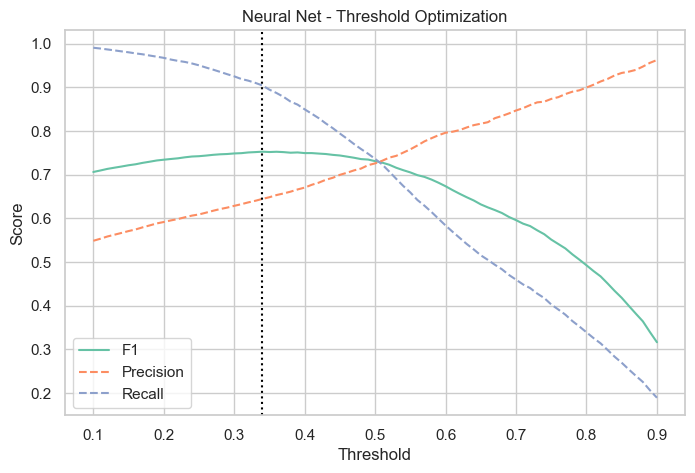

🔹 Neural Net (tuned thr) Validation
Best Threshold: 0.34
Accuracy:  0.7173
Precision: 0.6445
Recall:    0.9042
F1-score:  0.7526
ROC-AUC:   0.8343


In [45]:
# NN.5: Threshold optimization for NN
def optimize_threshold(y_true, y_probs, model_name="Model"):
    thresholds = np.linspace(0.1, 0.9, 81)
    precisions, recalls, f1s = [], [], []
    for t in thresholds:
        y_pred_t = (y_probs >= t).astype(int)
        precisions.append(precision_score(y_true, y_pred_t))
        recalls.append(recall_score(y_true, y_pred_t))
        f1s.append(f1_score(y_true, y_pred_t))
    best_idx = int(np.argmax(f1s))
    best_thr = thresholds[best_idx]
    return best_thr, precisions[best_idx], recalls[best_idx], f1s[best_idx], thresholds, precisions, recalls, f1s

best_thr_nn, best_prec_nn, best_rec_nn, best_f1_nn, ths, prs, rcs, f1s = optimize_threshold(y_val_np, y_val_prob_nn, "NN")

from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(ths, f1s, label="F1")
plt.plot(ths, prs, label="Precision", linestyle="--")
plt.plot(ths, rcs, label="Recall", linestyle="--")
plt.axvline(best_thr_nn, color="k", linestyle=":")
plt.title("Neural Net - Threshold Optimization")
plt.xlabel("Threshold"); plt.ylabel("Score"); plt.legend(); plt.show()

acc_thr_nn = accuracy_score(y_val_np, (y_val_prob_nn >= best_thr_nn).astype(int))

print(f"🔹 Neural Net (tuned thr) Validation")
print(f"Best Threshold: {best_thr_nn:.2f}")
print(f"Accuracy:  {acc_thr_nn:.4f}")
print(f"Precision: {best_prec_nn:.4f}")
print(f"Recall:    {best_rec_nn:.4f}")
print(f"F1-score:  {best_f1_nn:.4f}")
print(f"ROC-AUC:   {roc_nn:.4f}")


In [48]:
# NN-KAG.1: Build Kaggle-style MLP (dense stack with relu, sigmoid output)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

# Make sure we have numpy arrays
X_train_np = np.asarray(X_train.values, dtype=np.float32)
X_val_np   = np.asarray(X_val.values,   dtype=np.float32)
y_train_np = np.asarray(y_train.values, dtype=np.int32)
y_val_np   = np.asarray(y_val.values,   dtype=np.int32)

input_dim = X_train_np.shape[1]

model = Sequential()
model.add(layers.Input(shape=(input_dim,)))
model.add(layers.Dense(87, activation='relu'))
model.add(layers.Dense(76, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(53, activation='relu'))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(35, activation='relu'))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(9,  activation='relu'))
model.add(layers.Dense(4,  activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 87)                  │           3,045 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 76)                  │           6,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 53)                  │           3,445 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 46)                  │           2,484 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 35)                  │           1,645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 24)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,561 (92.04 KB)

 Trainable params: 23,561 (92.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# NN-KAG.2: Train similar to Kaggle settings

history = model.fit(
    X_train_np, y_train_np,
    epochs=50,
    batch_size=32,
    validation_split=0.20,   # like the Kaggle code
    verbose=1
)


Epoch 1/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7066 - loss: 0.5489 - val_accuracy: 0.7365 - val_loss: 0.5197
Epoch 2/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7349 - loss: 0.5129 - val_accuracy: 0.7388 - val_loss: 0.5162
Epoch 3/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7388 - loss: 0.5070 - val_accuracy: 0.7391 - val_loss: 0.5143
Epoch 4/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7404 - loss: 0.5024 - val_accuracy: 0.7376 - val_loss: 0.5133
Epoch 5/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7420 - loss: 0.4986 - val_accuracy: 0.7375 - val_loss: 0.5129
Epoch 6/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7428 - loss: 0.4950 - val_accuracy: 0.7339 - val_loss: 0.5164
Epoch 7/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7454 - loss: 0.4915 - val_accuracy: 0.7321 - val_loss: 0.5142
Epoch 8/50
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7468 - loss: 0.4887 -

In [50]:
# NN-KAG.3: Evaluate on our held-out validation set (not the internal split)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Default-threshold evaluation (0.5)
y_val_prob_nn_kag = model.predict(X_val_np, batch_size=1024).ravel()
y_val_pred_nn_kag = (y_val_prob_nn_kag >= 0.5).astype(int)

acc_kag  = accuracy_score(y_val_np, y_val_pred_nn_kag)
prec_kag = precision_score(y_val_np, y_val_pred_nn_kag)
rec_kag  = recall_score(y_val_np, y_val_pred_nn_kag)
f1_kag   = f1_score(y_val_np, y_val_pred_nn_kag)
roc_kag  = roc_auc_score(y_val_np, y_val_prob_nn_kag)

print("🔹 Kaggle-style NN (thr=0.5) on held-out validation")
print(f"Accuracy:  {acc_kag:.4f}")
print(f"Precision: {prec_kag:.4f}")
print(f"Recall:    {rec_kag:.4f}")
print(f"F1-score:  {f1_kag:.4f}")
print(f"ROC-AUC:   {roc_kag:.4f}")

print("\nClassification Report:")
print(classification_report(y_val_np, y_val_pred_nn_kag))


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
🔹 Kaggle-style NN (thr=0.5) on held-out validation
Accuracy:  0.7002
Precision: 0.7286
Recall:    0.5887
F1-score:  0.6512
ROC-AUC:   0.7818

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      6252
           1       0.73      0.59      0.65      5668

    accuracy                           0.70     11920
   macro avg       0.71      0.69      0.69     11920
weighted avg       0.70      0.70      0.70     11920



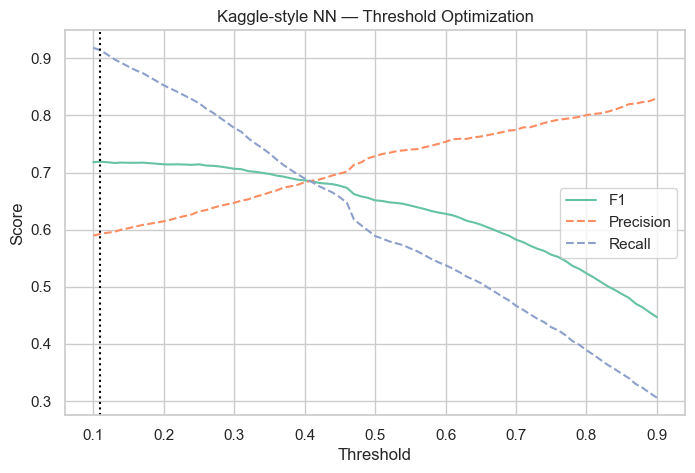

🔹 Kaggle-style NN (tuned threshold) on held-out validation
Best Threshold: 0.11
Accuracy:  0.6601
Precision: 0.5924
Recall:    0.9141
F1-score:  0.7189
ROC-AUC:   0.7818


In [51]:
# NN-KAG.4: Threshold sweep to maximize F1
import numpy as np
import matplotlib.pyplot as plt

def optimize_threshold(y_true, y_probs):
    thresholds = np.linspace(0.1, 0.9, 81)
    precisions, recalls, f1s = [], [], []
    for t in thresholds:
        y_pred_t = (y_probs >= t).astype(int)
        precisions.append(precision_score(y_true, y_pred_t))
        recalls.append(recall_score(y_true, y_pred_t))
        f1s.append(f1_score(y_true, y_pred_t))
    best_idx = int(np.argmax(f1s))
    return thresholds[best_idx], precisions[best_idx], recalls[best_idx], f1s[best_idx], thresholds, precisions, recalls, f1s

best_thr, best_prec, best_rec, best_f1, ths, prs, rcs, f1s = optimize_threshold(y_val_np, y_val_prob_nn_kag)

plt.figure(figsize=(8,5))
plt.plot(ths, f1s, label="F1")
plt.plot(ths, prs, label="Precision", linestyle="--")
plt.plot(ths, rcs, label="Recall", linestyle="--")
plt.axvline(best_thr, color="k", linestyle=":")
plt.title("Kaggle-style NN — Threshold Optimization")
plt.xlabel("Threshold"); plt.ylabel("Score"); plt.legend(); plt.show()

acc_thr = accuracy_score(y_val_np, (y_val_prob_nn_kag >= best_thr).astype(int))

print("🔹 Kaggle-style NN (tuned threshold) on held-out validation")
print(f"Best Threshold: {best_thr:.2f}")
print(f"Accuracy:  {acc_thr:.4f}")
print(f"Precision: {best_prec:.4f}")
print(f"Recall:    {best_rec:.4f}")
print(f"F1-score:  {best_f1:.4f}")
print(f"ROC-AUC:   {roc_kag:.4f}")


In [52]:
# NN-KAG.5: Optional — replicate their "evaluate on x, y" style (training data)
loss_tr, acc_tr = model.evaluate(X_train_np, y_train_np, verbose=0)
print(f"Kaggle-style train-eval -> Loss: {loss_tr:.4f}, Accuracy: {acc_tr:.4f}")


Kaggle-style train-eval -> Loss: 0.4639, Accuracy: 0.7840


In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# numpy arrays (keras likes np arrays)
X_train_np = np.asarray(X_train.values, dtype=np.float32)
X_val_np   = np.asarray(X_val.values,   dtype=np.float32)
y_train_np = np.asarray(y_train.values, dtype=np.int32)
y_val_np   = np.asarray(y_val.values,   dtype=np.int32)

def build_regularized_mlp(input_dim, hidden=[384, 256, 128, 64], dropout=0.30, l2=2e-4):
    keras.utils.set_random_seed(42)
    inp = keras.Input(shape=(input_dim,))
    x = inp
    for h in hidden:
        x = layers.Dense(h, kernel_initializer="he_normal",
                         kernel_regularizer=keras.regularizers.l2(l2))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.Dropout(dropout)(x)
    out = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inp, out)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss="binary_crossentropy",
                  metrics=[keras.metrics.AUC(name="auc")])
    return model

mlp_adv = build_regularized_mlp(X_train_np.shape[1], hidden=[384,256,128,64], dropout=0.30, l2=2e-4)
mlp_adv.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 34)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 384)                 │          13,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 384)                 │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,545 (611.50 KB)

 Trainable params: 154,881 (605.00 KB)

 Non-trainable params: 1,664 (6.50 KB)

In [54]:
early = keras.callbacks.EarlyStopping(monitor="val_auc", mode="max",
                                      patience=8, restore_best_weights=True)
reduce = keras.callbacks.ReduceLROnPlateau(monitor="val_auc", mode="max",
                                           factor=0.5, patience=3, min_lr=1e-5, verbose=1)

history = mlp_adv.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=80,
    batch_size=512,       # try 256 if you prefer
    callbacks=[early, reduce],
    verbose=1
)


Epoch 1/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - auc: 0.6682 - loss: 0.9841 - val_auc: 0.7612 - val_loss: 0.9037 - learning_rate: 0.0010
Epoch 2/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - auc: 0.7622 - loss: 0.8645 - val_auc: 0.8025 - val_loss: 0.8175 - learning_rate: 0.0010
Epoch 3/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - auc: 0.7880 - loss: 0.8054 - val_auc: 0.8146 - val_loss: 0.7636 - learning_rate: 0.0010
Epoch 4/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - auc: 0.7987 - loss: 0.7643 - val_auc: 0.8189 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 5/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - auc: 0.8061 - loss: 0.7287 - val_auc: 0.8228 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 6/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - auc: 0.8107 - loss: 0.6983 - val_auc: 0.8250 - val_loss: 0.6666 - learning_rate: 0.0010
Epoch 7/80
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - auc: 0.8154 - loss: 0.6719 - val_auc: 0.8256 - val_loss: 0.6471 - learning_rate: 0.0010
Epoch 8/80
94

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
🔹 Regularized MLP (thr=0.5)
Accuracy:  0.7411
Precision: 0.7193
Recall:    0.7470
F1-score:  0.7329
ROC-AUC:   0.8338


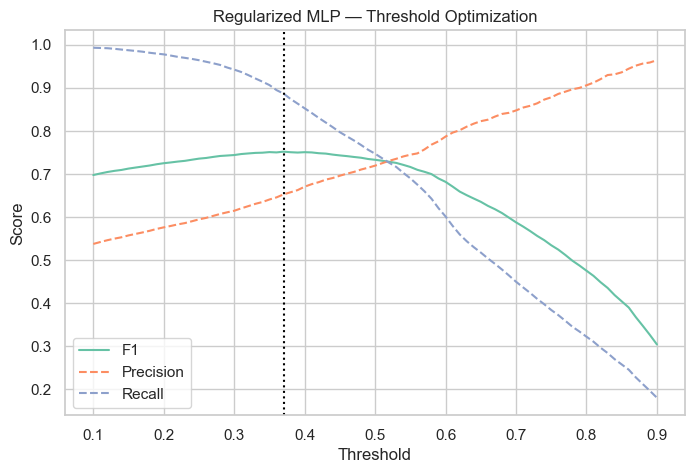

🔹 Regularized MLP (tuned thr)
Best Threshold: 0.37
Accuracy:  0.7216
Precision: 0.6526
Recall:    0.8866
F1-score:  0.7518
ROC-AUC:   0.8338


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Probabilities on validation
y_val_prob_adv = mlp_adv.predict(X_val_np, batch_size=1024).ravel()

# Default 0.5
y_val_pred_05 = (y_val_prob_adv >= 0.5).astype(int)
acc_05  = accuracy_score(y_val_np, y_val_pred_05)
prec_05 = precision_score(y_val_np, y_val_pred_05)
rec_05  = recall_score(y_val_np, y_val_pred_05)
f1_05   = f1_score(y_val_np, y_val_pred_05)
auc_adv = roc_auc_score(y_val_np, y_val_prob_adv)

print("🔹 Regularized MLP (thr=0.5)")
print(f"Accuracy:  {acc_05:.4f}")
print(f"Precision: {prec_05:.4f}")
print(f"Recall:    {rec_05:.4f}")
print(f"F1-score:  {f1_05:.4f}")
print(f"ROC-AUC:   {auc_adv:.4f}")

# Threshold sweep for F1
def optimize_threshold(y_true, y_probs):
    ths = np.linspace(0.1, 0.9, 81)
    prs, rcs, f1s = [], [], []
    for t in ths:
        yp = (y_probs >= t).astype(int)
        prs.append(precision_score(y_true, yp))
        rcs.append(recall_score(y_true, yp))
        f1s.append(f1_score(y_true, yp))
    best_i = int(np.argmax(f1s))
    return ths[best_i], prs[best_i], rcs[best_i], f1s[best_i], ths, prs, rcs, f1s

best_thr, best_prec, best_rec, best_f1, ths, prs, rcs, f1s = optimize_threshold(y_val_np, y_val_prob_adv)

plt.figure(figsize=(8,5))
plt.plot(ths, f1s, label="F1")
plt.plot(ths, prs, label="Precision", linestyle="--")
plt.plot(ths, rcs, label="Recall", linestyle="--")
plt.axvline(best_thr, color="k", linestyle=":")
plt.title("Regularized MLP — Threshold Optimization")
plt.xlabel("Threshold"); plt.ylabel("Score"); plt.legend(); plt.show()

acc_thr = accuracy_score(y_val_np, (y_val_prob_adv >= best_thr).astype(int))
print("🔹 Regularized MLP (tuned thr)")
print(f"Best Threshold: {best_thr:.2f}")
print(f"Accuracy:  {acc_thr:.4f}")
print(f"Precision: {best_prec:.4f}")
print(f"Recall:    {best_rec:.4f}")
print(f"F1-score:  {best_f1:.4f}")
print(f"ROC-AUC:   {auc_adv:.4f}")


In [56]:
# Optional: Focal Loss
import tensorflow as tf

def focal_binary_crossentropy(gamma=2.0, alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        eps = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, eps, 1.0 - eps)
        ce = -(y_true * tf.math.log(y_pred) + (1.0 - y_true) * tf.math.log(1.0 - y_pred))
        p_t = y_true * y_pred + (1.0 - y_true) * (1.0 - y_pred)
        fl = alpha * tf.pow(1.0 - p_t, gamma) * ce
        return tf.reduce_mean(fl)
    return loss

mlp_focal = build_regularized_mlp(X_train_np.shape[1], hidden=[384,256,128,64], dropout=0.30, l2=2e-4)
mlp_focal.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss=focal_binary_crossentropy(gamma=2.0, alpha=0.25),
                  metrics=[keras.metrics.AUC(name="auc")])

history_focal = mlp_focal.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=60, batch_size=512,
    callbacks=[early, reduce], verbose=1
)

y_val_prob_focal = mlp_focal.predict(X_val_np, batch_size=1024).ravel()
# …then reuse the same threshold sweep to get best F1 for focal model


Epoch 1/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - auc: 0.5889 - loss: 0.3415 - val_auc: 0.6775 - val_loss: 0.2755 - learning_rate: 0.0010
Epoch 2/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - auc: 0.6841 - loss: 0.2345 - val_auc: 0.7740 - val_loss: 0.1883 - learning_rate: 0.0010
Epoch 3/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - auc: 0.7253 - loss: 0.1760
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - auc: 0.7356 - loss: 0.1613 - val_auc: 0.7980 - val_loss: 0.1309 - learning_rate: 0.0010
Epoch 4/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - auc: 0.7606 - loss: 0.1221 - val_auc: 0.8076 - val_loss: 0.1094 - learning_rate: 5.0000e-04
Epoch 5/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - auc: 0.7747 - loss: 0.1022 - val_auc: 0.8108 - val_loss: 0.0918 - learning_rate: 5.0000e-04
Epoch 6/60
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - auc: 0.7823 - loss: 0.0898
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.000250